Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. L’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients…

La mission en 2 étapes :

Une analyse des différents indicateurs de vente
Une analyse plus ciblée sur les clients : l’objectif serait cette fois-ci de comprendre le comportement des clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via les librairies physiques
Extraire les informations suivantes :

- Différents indicateurs et graphiques autour du chiffre d’affaires
- Evolution dans le temps et mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale
Zoom sur les références ( Top, Flop, repartition par catégories …)
Informations sur les profils des clients + repartition CA entre eux via courbe de Lorenz
Le lien entre le genre d’un client et les catégories des livres achetés
Le lien entre l’âge des clients et le montant total des achats
La fréquence d’achat, la taille du panier moyen et les catégories des livres achetés.

# Chargement des librairies et fichiers source 

In [137]:
# Chargement des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import dabl
import plotly.express as px
import seaborn as sns
from scipy.stats import spearmanr
import researchpy as rp
import scipy.stats as stats
from functions import *
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importation des fichiers sources

cust = pd.read_csv('customers.csv')
prod = pd.read_csv('products.csv')
trans = pd.read_csv ('transactions.csv')

# Nettoyage et fusions des DF

## DF customers

SHAPE:
(8623, 3)

----------------------
UNIQUE:
client_id    8623
sex             2
birth          76
dtype: int64

----------------------
COUNT:
client_id    8623
sex          8623
birth        8623
dtype: int64

----------------------
NULL:
client_id    0
sex          0
birth        0
dtype: int64

----------------------
Taux de valeurs manquantes (%):
client_id    0.0
sex          0.0
birth        0.0
dtype: float64

----------------------
DUPLICATED:
0

----------------------


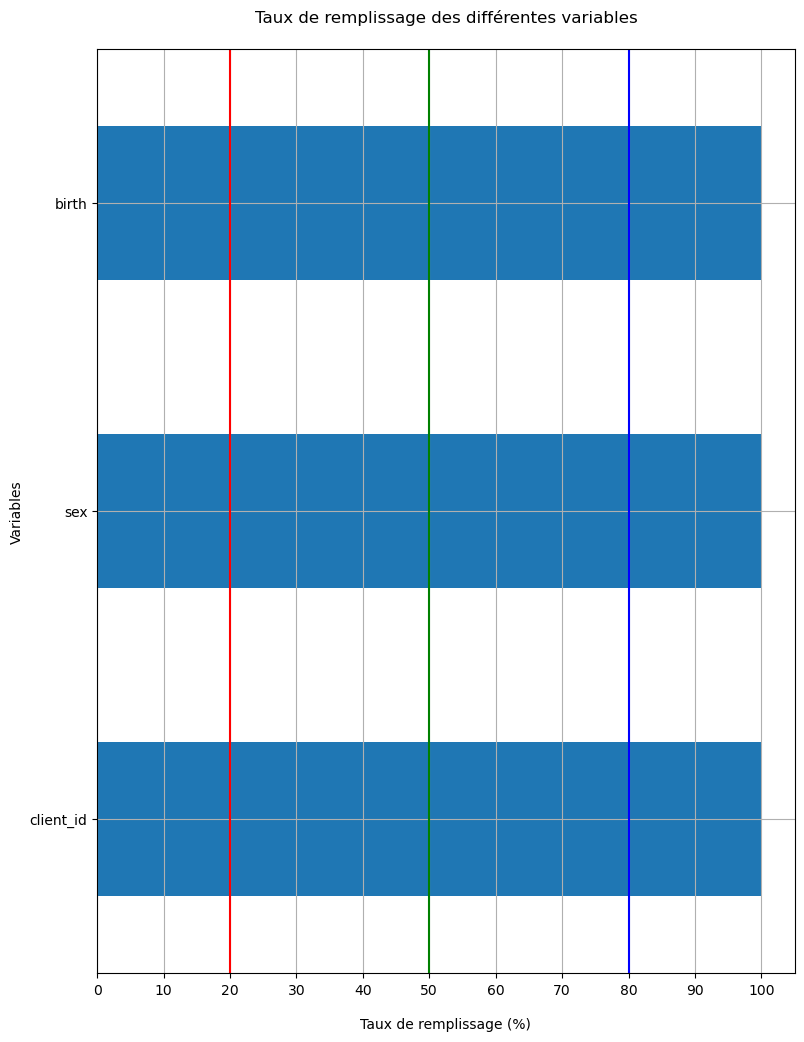

In [3]:
# Fonction issue de ma librairie personnelle permettant un aperçu des informations sur les variables

verif(cust)

In [4]:
# visualisation du df customers

cust.describe()

birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000

In [5]:
cust.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

## DF products

SHAPE:
(3287, 3)

----------------------
UNIQUE:
id_prod    3287
price      1455
categ         3
dtype: int64

----------------------
COUNT:
id_prod    3287
price      3287
categ      3287
dtype: int64

----------------------
NULL:
id_prod    0
price      0
categ      0
dtype: int64

----------------------
Taux de valeurs manquantes (%):
id_prod    0.0
price      0.0
categ      0.0
dtype: float64

----------------------
DUPLICATED:
0

----------------------


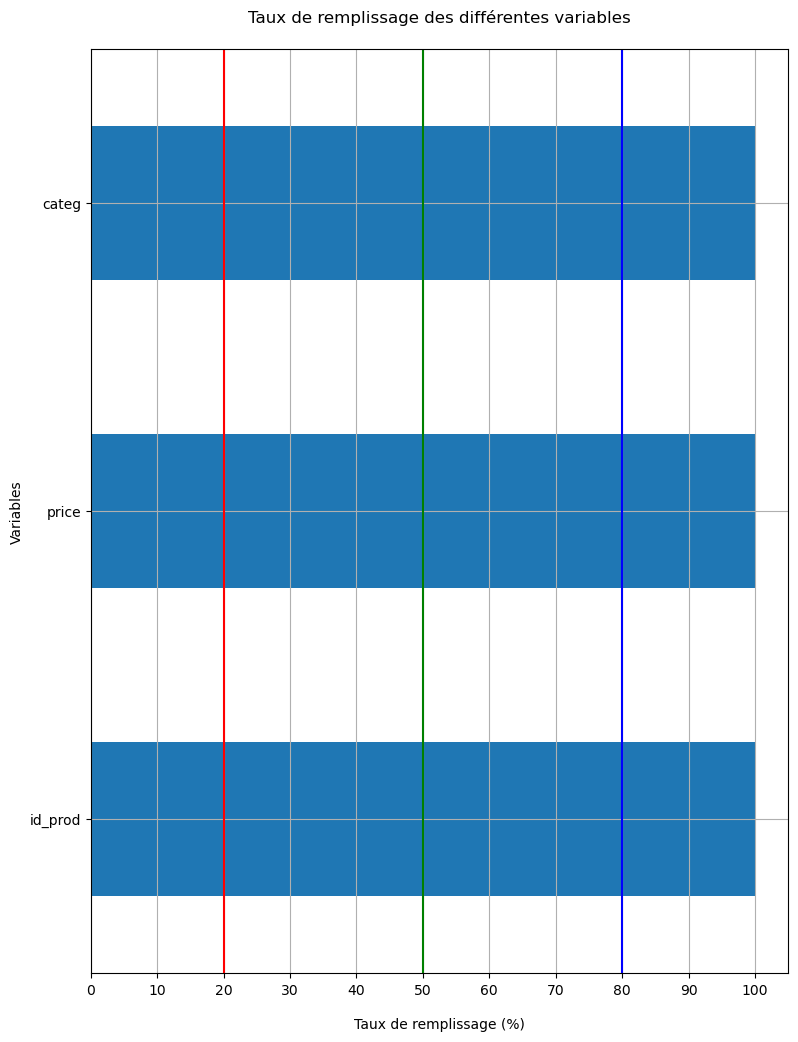

In [6]:
#visualisation du df products

verif(prod)

In [7]:
prod.sort_values ( by = 'price', ascending = False )

id_prod   price  categ
947      2_2  300.00      2
724     2_76  254.44      2
394    2_158  247.22      2
1436   2_167  236.99      2
2779    2_30  233.54      2
...      ...     ...    ...
1211  0_1844    0.77      0
370    0_120    0.66      0
2272   0_528    0.62      0
2355   0_202    0.62      0
731      T_0   -1.00      0

[3287 rows x 3 columns]

In [8]:
print(prod.min())
print(prod.max())

id_prod    0_0
price     -1.0
categ        0
dtype: object
id_prod      T_0
price      300.0
categ          2
dtype: object


In [9]:
# Suppression du profil Test present dans le df

prod = prod[prod.id_prod != 'T_0']

In [10]:
print(prod.min())
print(prod.max())

id_prod     0_0
price      0.62
categ         0
dtype: object
id_prod     2_99
price      300.0
categ          2
dtype: object


## DF Transactions

SHAPE:
(679532, 4)

----------------------
UNIQUE:
id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

----------------------
COUNT:
id_prod       679532
date          679532
session_id    679532
client_id     679532
dtype: int64

----------------------
NULL:
id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

----------------------
Taux de valeurs manquantes (%):
id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

----------------------
DUPLICATED:
126

----------------------


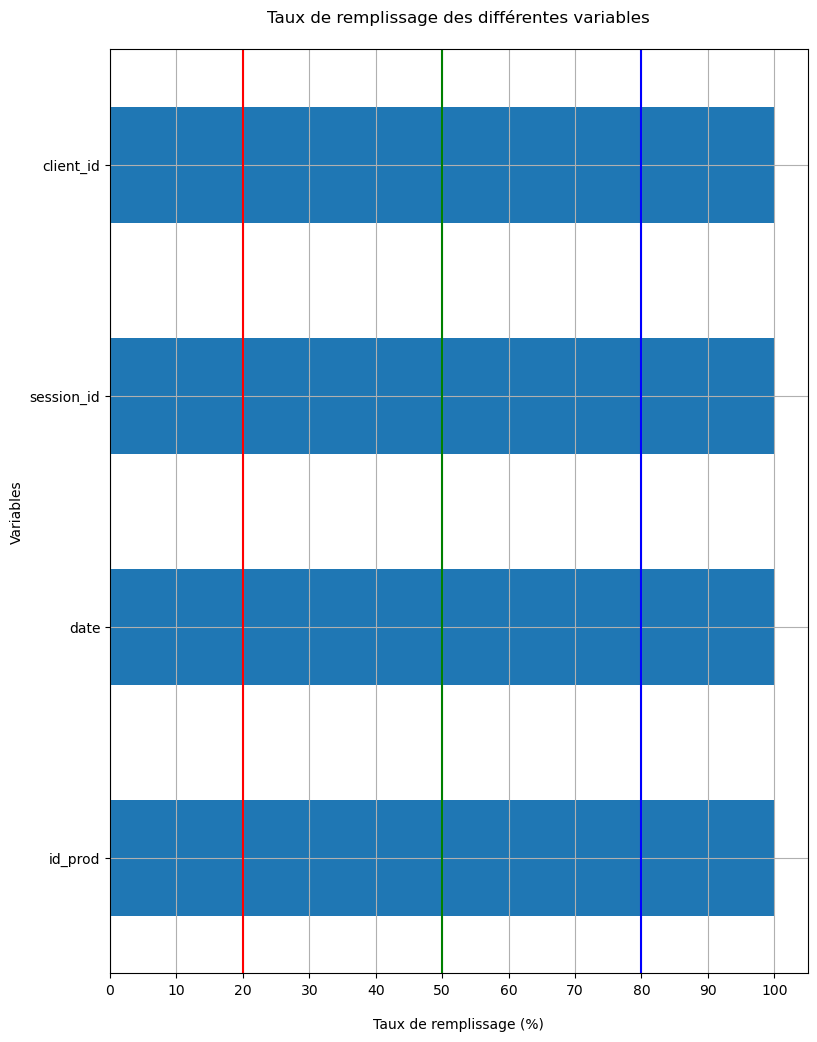

In [11]:
# visualisation du df

verif(trans)

In [12]:
trans.describe()

id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488

In [13]:
# suppression des doublons

trans = trans.drop_duplicates()
trans.shape

(679406, 4)

## Liaison entre les df

In [14]:
# laison entre les df transactions et products

trans_prod = trans.merge(prod, how = "outer", on = "id_prod")

In [15]:
trans_prod.shape

(679427, 6)

In [16]:
# liaison entre les df ( transactions, products) et customers

df_lapage = trans_prod.merge(cust, how = "outer", on = "client_id")
df_lapage.sort_values(by = 'date', ascending = False)

id_prod                             date session_id client_id  price  \
679322     T_0  test_2021-03-01 02:30:02.237450        s_0      ct_0    NaN   
679305     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_0    NaN   
679374     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1    NaN   
679329     T_0  test_2021-03-01 02:30:02.237448        s_0      ct_0    NaN   
679366     T_0  test_2021-03-01 02:30:02.237447        s_0      ct_1    NaN   
...        ...                              ...        ...       ...    ...   
679443     NaN                              NaN        NaN     c_862    NaN   
679444     NaN                              NaN        NaN    c_7584    NaN   
679445     NaN                              NaN        NaN      c_90    NaN   
679446     NaN                              NaN        NaN     c_587    NaN   
679447     NaN                              NaN        NaN    c_3526    NaN   

        categ sex   birth  
679322    NaN   f  2001.0  
679305    NaN   f  2001.0  
679374    NaN   m  2001.0  
679329    NaN   f  2001.0  
679366    NaN   m  2001.0  
...       ...  ..     ...  
679443    NaN   f  1956.0  
679444    NaN   f  1960.0  
679445    NaN   m  2001.0  
679446    NaN   m  1993.0  
679447    NaN   m  1956.0  

[679448 rows x 8 columns]

In [17]:
#df_lapage = df_lapage[df_lapage.session_id != 's_0']
df_lapage = df_lapage[df_lapage["date"].str.contains("test") == False ]

df_lapage.loc[df_lapage["id_prod"] == "T_0"]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, sex, birth]
Index: []

In [18]:
df_lapage.sort_values(by = 'date', ascending = False)

id_prod                        date session_id client_id  price  categ  \
398652  0_1398  2023-02-28 23:58:30.792755   s_348435    c_3575   4.52    0.0   
428188  0_1547  2023-02-28 23:58:00.107815   s_348447    c_4848   8.99    0.0   
476829   1_695  2023-02-28 23:53:18.929676   s_348446     c_488  26.99    1.0   
153419    2_37  2023-02-28 23:51:29.318531   s_348445      c_50  48.99    2.0   
163305   1_508  2023-02-28 23:49:03.148402   s_348444    c_3573  21.92    1.0   
...        ...                         ...        ...       ...    ...    ...   
595898  0_1358  2021-03-01 00:05:18.801198        s_5    c_2033  16.49    0.0   
316014  0_1458  2021-03-01 00:04:54.559692        s_4    c_7912   6.55    0.0   
221213  0_1352  2021-03-01 00:02:38.311413        s_3     c_580   4.50    0.0   
497884  0_1390  2021-03-01 00:02:26.047414        s_2     c_664  19.37    0.0   
468405  0_1259  2021-03-01 00:01:07.843138        s_1     c_329  11.99    0.0   

       sex   birth  
398652   f  1981.0  
428188   m  1953.0  
476829   f  1985.0  
153419   f  1994.0  
163305   f  1996.0  
...     ..     ...  
595898   f  1956.0  
316014   f  1989.0  
221213   m  1988.0  
497884   m  1960.0  
468405   f  1967.0  

[679332 rows x 8 columns]

In [19]:
df_lapage.shape

(679332, 8)

## Recherche d'anomalie et résolution

In [20]:
df_lapage.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
sex             0
birth           0
dtype: int64

In [21]:
# visualisation des lignes avec presence de NaN

df_lapage[df_lapage["price"].isna()]

id_prod                        date session_id client_id  price  categ  \
37861   0_2245  2021-04-22 04:57:20.090378    s_23987    c_6714    NaN    NaN   
37862   0_2245  2021-06-05 17:04:43.982913    s_44481    c_6714    NaN    NaN   
37863   0_2245  2022-04-05 17:04:43.982913   s_189669    c_6714    NaN    NaN   
37864   0_2245  2022-05-05 17:04:43.982913   s_204093    c_6714    NaN    NaN   
37865   0_2245  2022-12-05 17:04:43.982913   s_307520    c_6714    NaN    NaN   
...        ...                         ...        ...       ...    ...    ...   
654934  0_2245  2021-09-07 20:55:19.719028    s_86505    c_8153    NaN    NaN   
656406  0_2245  2021-10-20 13:11:05.671456   s_107564    c_1746    NaN    NaN   
660365  0_2245  2021-04-10 06:15:32.619826    s_18510     c_277    NaN    NaN   
660366  0_2245  2022-04-10 06:15:32.619826   s_191872     c_277    NaN    NaN   
660514  0_2245  2021-10-15 09:31:31.539354   s_105069    c_4188    NaN    NaN   

       sex   birth  
37861    f  1968.0  
37862    f  1968.0  
37863    f  1968.0  
37864    f  1968.0  
37865    f  1968.0  
...     ..     ...  
654934   f  1975.0  
656406   m  1994.0  
660365   f  2000.0  
660366   f  2000.0  
660514   f  1935.0  

[221 rows x 8 columns]

In [22]:
# Les NaN correspondent à la categorie 0 de par la référence du produit
# -> recherche de la valeur moyenne des produits de categorie 0 

df_categ0 = df_lapage.loc[df_lapage["categ"] == 0]

In [23]:
df_categ0.groupby('categ').mean()

price        birth
categ                        
0.0    10.638188  1978.102554

In [24]:
# Les NaN correspondent à la categorie 0 de par la référence du produit 

df_lapage["categ"].fillna(0, inplace = True)

In [25]:
# Implémentation des valeurs manquantes avec le prix moyen des produits de la catégorie 0

df_lapage["price"].fillna(10.63, inplace = True)

In [26]:
# Verification de la présence de valeurs nulle

df_lapage.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
dtype: int64

In [27]:
# Vérification du types des variables dans le df final

df_lapage.dtypes

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth         float64
dtype: object

In [28]:
# Conversion de la variable date
df_lapage['date'] = pd.to_datetime(df_lapage['date']).dt.normalize()
df_lapage.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
price                float64
categ                float64
sex                   object
birth                float64
dtype: object

In [29]:
df_lapage

id_prod       date session_id client_id   price  categ sex   birth
0       0_1518 2022-05-20   s_211425     c_103    4.18    0.0   f  1986.0
1       0_1518 2021-07-20    s_64849     c_103    4.18    0.0   f  1986.0
2       0_1518 2022-08-20   s_255965     c_103    4.18    0.0   f  1986.0
3       0_1418 2022-06-18   s_225411     c_103    8.57    0.0   f  1986.0
4       0_1418 2021-08-18    s_77214     c_103    8.57    0.0   f  1986.0
...        ...        ...        ...       ...     ...    ...  ..     ...
679401   2_147 2021-07-23    s_65994    c_4391  181.99    2.0   f  2001.0
679402   0_142 2022-03-25   s_184472    c_1232   19.85    0.0   f  1960.0
679403   0_142 2021-09-25    s_95415    c_1232   19.85    0.0   f  1960.0
679404   2_205 2021-03-11     s_4605    c_7534  100.99    2.0   m  1992.0
679405   2_205 2022-07-11   s_236636    c_7534  100.99    2.0   m  1992.0

[679332 rows x 8 columns]

In [30]:
# Verification des valeurs maxi et mini du df final

df_lapage.describe()

price          categ          birth
count  679332.000000  679332.000000  679332.000000
mean       17.452553       0.441809    1977.811139
std        18.326429       0.594998      13.574553
min         0.620000       0.000000    1929.000000
25%         8.870000       0.000000    1970.000000
50%        13.990000       0.000000    1980.000000
75%        18.990000       1.000000    1987.000000
max       300.000000       2.000000    2004.000000

In [31]:
# rajout de colonnes année, mois, jour

df_lapage['year']= df_lapage.date.dt.year
df_lapage['month']= df_lapage.date.dt.month
df_lapage['day']= df_lapage.date.dt.day

df_lapage.head()

id_prod       date session_id client_id  price  categ sex   birth  year  \
0  0_1518 2022-05-20   s_211425     c_103   4.18    0.0   f  1986.0  2022   
1  0_1518 2021-07-20    s_64849     c_103   4.18    0.0   f  1986.0  2021   
2  0_1518 2022-08-20   s_255965     c_103   4.18    0.0   f  1986.0  2022   
3  0_1418 2022-06-18   s_225411     c_103   8.57    0.0   f  1986.0  2022   
4  0_1418 2021-08-18    s_77214     c_103   8.57    0.0   f  1986.0  2021   

   month  day  
0      5   20  
1      7   20  
2      8   20  
3      6   18  
4      8   18

# Indicateurs autour du CA

## Chiffre d'affaire par an

In [32]:
lapage_y = df_lapage.groupby(['year']).agg({'price':'sum'})
lapage_y

price
year            
2021  4771751.37
2022  6109957.41
2023   974369.13

In [33]:
#Calcul du chiffre d'affaire total

print("{:,}".format(round(df_lapage['price'].sum())).replace(",", "X").replace(".", ",").replace("X", "."),'euros')

11.856.078 euros


## Evolution du chiffre d'affaire par mois par categorie

In [34]:
df_lapage= df_lapage.set_index(['date'])
chiffre_affaire= df_lapage.groupby(['categ']).resample('M').sum()
mycolumns = ['price']

data_categ = chiffre_affaire[mycolumns]
data_categ


price
categ date                 
0.0   2021-03-31  193724.84
      2021-04-30  205371.28
      2021-05-31  196271.76
      2021-06-30  168017.56
      2021-07-31  144793.31
...                     ...
2.0   2022-10-31  120878.94
      2022-11-30  111642.60
      2022-12-31  123803.09
      2023-01-31  126153.08
      2023-02-28  113875.52

[72 rows x 1 columns]

In [35]:
# Revenir d'une trame de données à index multiple à une trame à index unique 

df_categ = data_categ.reset_index(level=['categ','date'])
df_categ

categ       date      price
0     0.0 2021-03-31  193724.84
1     0.0 2021-04-30  205371.28
2     0.0 2021-05-31  196271.76
3     0.0 2021-06-30  168017.56
4     0.0 2021-07-31  144793.31
..    ...        ...        ...
67    2.0 2022-10-31  120878.94
68    2.0 2022-11-30  111642.60
69    2.0 2022-12-31  123803.09
70    2.0 2023-01-31  126153.08
71    2.0 2023-02-28  113875.52

[72 rows x 3 columns]

In [36]:
# Conversion du type de la date 

df_categ['date'] = pd.to_datetime(df_categ['date'], infer_datetime_format= True)
df_categ = df_categ.set_index(['date'])
df_categ.rename(columns= {'price':'chiffre d_affaire'}, inplace = True) 
df_categ

categ  chiffre d_affaire
date                                
2021-03-31    0.0          193724.84
2021-04-30    0.0          205371.28
2021-05-31    0.0          196271.76
2021-06-30    0.0          168017.56
2021-07-31    0.0          144793.31
...           ...                ...
2022-10-31    2.0          120878.94
2022-11-30    2.0          111642.60
2022-12-31    2.0          123803.09
2023-01-31    2.0          126153.08
2023-02-28    2.0          113875.52

[72 rows x 2 columns]

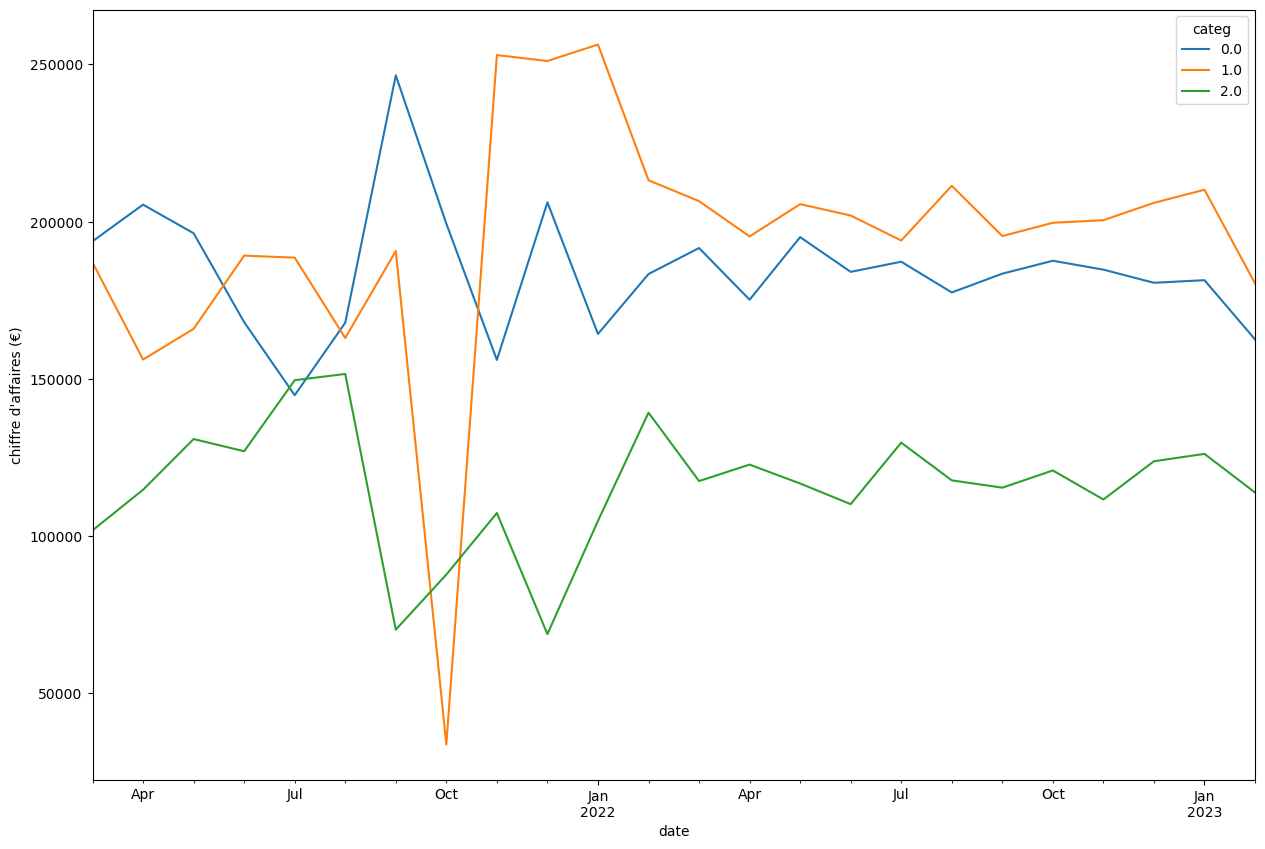

In [37]:
# Evolution du chiffre d'affaire par mois et categorie

df_categ.set_index('categ',append=True).unstack()['chiffre d_affaire'].plot(figsize=(15,10))
plt.xlabel("date")
plt.ylabel("chiffre d'affaires (€)")
plt.show()

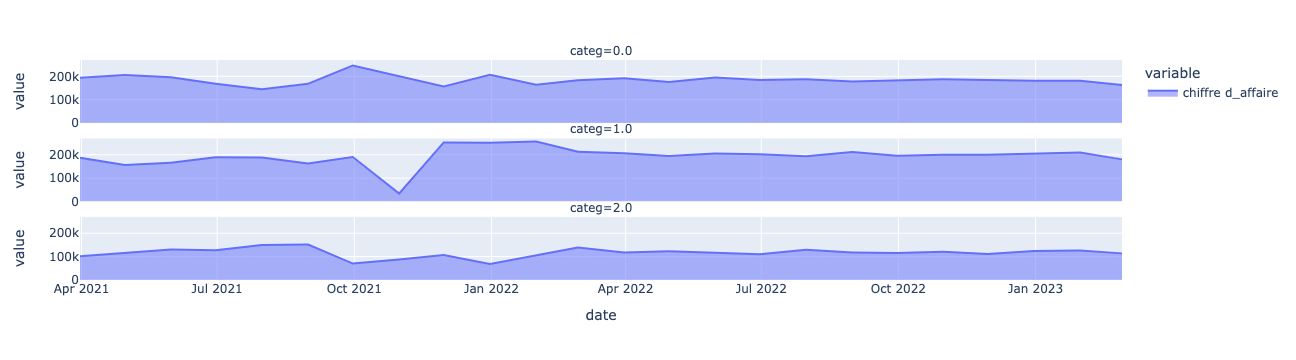

In [38]:
fig = px.area(df_categ, facet_col="categ", facet_col_wrap=1)
fig.show()

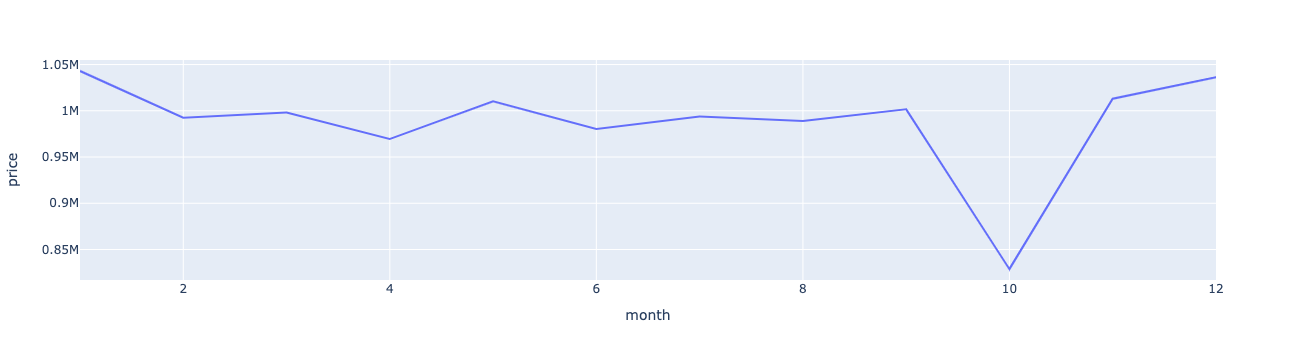

In [39]:
# CA par mois

df_month = df_lapage.groupby("month").sum().reset_index()

px.line(df_month,
        y="price",
        x="month")

In [40]:
# vérification du nombre de transaction sur le mois d'octobre car anomalie representé sur le graphique
# création d'un df sur les données du mois d'octobre pour la categorie 1

df_octobre = df_lapage.loc[df_lapage["month"] == 10]
df_octobre_1 = df_octobre.loc[df_octobre['categ']==1]
df_octobre_1[['session_id', 'year','price']].groupby('year').count()

session_id  price
year                   
2021        1666   1666
2022        9726   9726

In [41]:
### SUPPRIMER CELLULE SI BUG PLUS BAS

df_lapage.reset_index(inplace = True)
df_lapage

date id_prod session_id client_id   price  categ sex   birth  \
0      2022-05-20  0_1518   s_211425     c_103    4.18    0.0   f  1986.0   
1      2021-07-20  0_1518    s_64849     c_103    4.18    0.0   f  1986.0   
2      2022-08-20  0_1518   s_255965     c_103    4.18    0.0   f  1986.0   
3      2022-06-18  0_1418   s_225411     c_103    8.57    0.0   f  1986.0   
4      2021-08-18  0_1418    s_77214     c_103    8.57    0.0   f  1986.0   
...           ...     ...        ...       ...     ...    ...  ..     ...   
679327 2021-07-23   2_147    s_65994    c_4391  181.99    2.0   f  2001.0   
679328 2022-03-25   0_142   s_184472    c_1232   19.85    0.0   f  1960.0   
679329 2021-09-25   0_142    s_95415    c_1232   19.85    0.0   f  1960.0   
679330 2021-03-11   2_205     s_4605    c_7534  100.99    2.0   m  1992.0   
679331 2022-07-11   2_205   s_236636    c_7534  100.99    2.0   m  1992.0   

        year  month  day  
0       2022      5   20  
1       2021      7   20  
2       2022      8   20  
3       2022      6   18  
4       2021      8   18  
...      ...    ...  ...  
679327  2021      7   23  
679328  2022      3   25  
679329  2021      9   25  
679330  2021      3   11  
679331  2022      7   11  

[679332 rows x 11 columns]

In [42]:
# Probleme sur le mois d'octobre 2021 , suppression du mois afin de ne pas avoir une visualisation et tests faussés

df_lapage_smooth = df_lapage[['price','year', 'month','categ','date']].groupby (
    ['year','month','categ','date']).count().reset_index()

df_lapage_smooth

year  month  categ       date  price
0     2021      3    0.0 2021-03-01    582
1     2021      3    0.0 2021-03-02    621
2     2021      3    0.0 2021-03-03    591
3     2021      3    0.0 2021-03-04    563
4     2021      3    0.0 2021-03-05    561
...    ...    ...    ...        ...    ...
2159  2023      2    2.0 2023-02-24     47
2160  2023      2    2.0 2023-02-25     46
2161  2023      2    2.0 2023-02-26     53
2162  2023      2    2.0 2023-02-27     75
2163  2023      2    2.0 2023-02-28     50

[2164 rows x 5 columns]

In [43]:
# recherche des index correspondants au mois, catégorie et année recherché

np.where((df_lapage_smooth['year'] == 2021) & (df_lapage_smooth['month'] == 10))

(array([642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,
        655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667,
        668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680,
        681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693,
        694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706,
        707, 708]),)

In [44]:
# suppression des index correspondants au mois d'octobre 2021 pour la catégorie 1

df_lapage_smooth.drop(df_lapage_smooth.index[
    [642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654,
        655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667,
        668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680,
        681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693,
        694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706,
        707, 708]], inplace = True)

In [45]:
# Vérification de la suppression

display(df_lapage_smooth.loc[(df_lapage_smooth['year']==2021) & (df_lapage_smooth['month']== 10) 
                             & (df_lapage_smooth['categ']== 1),['year','month','categ']])

Empty DataFrame
Columns: [year, month, categ]
Index: []

In [46]:
df_lapage_smooth.loc[df_lapage_smooth["month"] == 10]

year  month  categ       date  price
1711  2022     10    0.0 2022-10-01    582
1712  2022     10    0.0 2022-10-02    527
1713  2022     10    0.0 2022-10-03    614
1714  2022     10    0.0 2022-10-04    521
1715  2022     10    0.0 2022-10-05    476
...    ...    ...    ...        ...    ...
1799  2022     10    2.0 2022-10-27     74
1800  2022     10    2.0 2022-10-28     57
1801  2022     10    2.0 2022-10-29     68
1802  2022     10    2.0 2022-10-30     57
1803  2022     10    2.0 2022-10-31     57

[93 rows x 5 columns]

## nombre de transaction en fonction du temps et de la catégorie

In [47]:
df_lapage[['price','year', 'categ' ]].groupby (['year','categ']).count()

price
year categ        
2021 0.0    177071
     1.0     86716
     2.0     14548
2022 0.0    206272
     1.0    121412
     2.0     18816
2023 0.0     32337
     1.0     19041
     2.0      3119

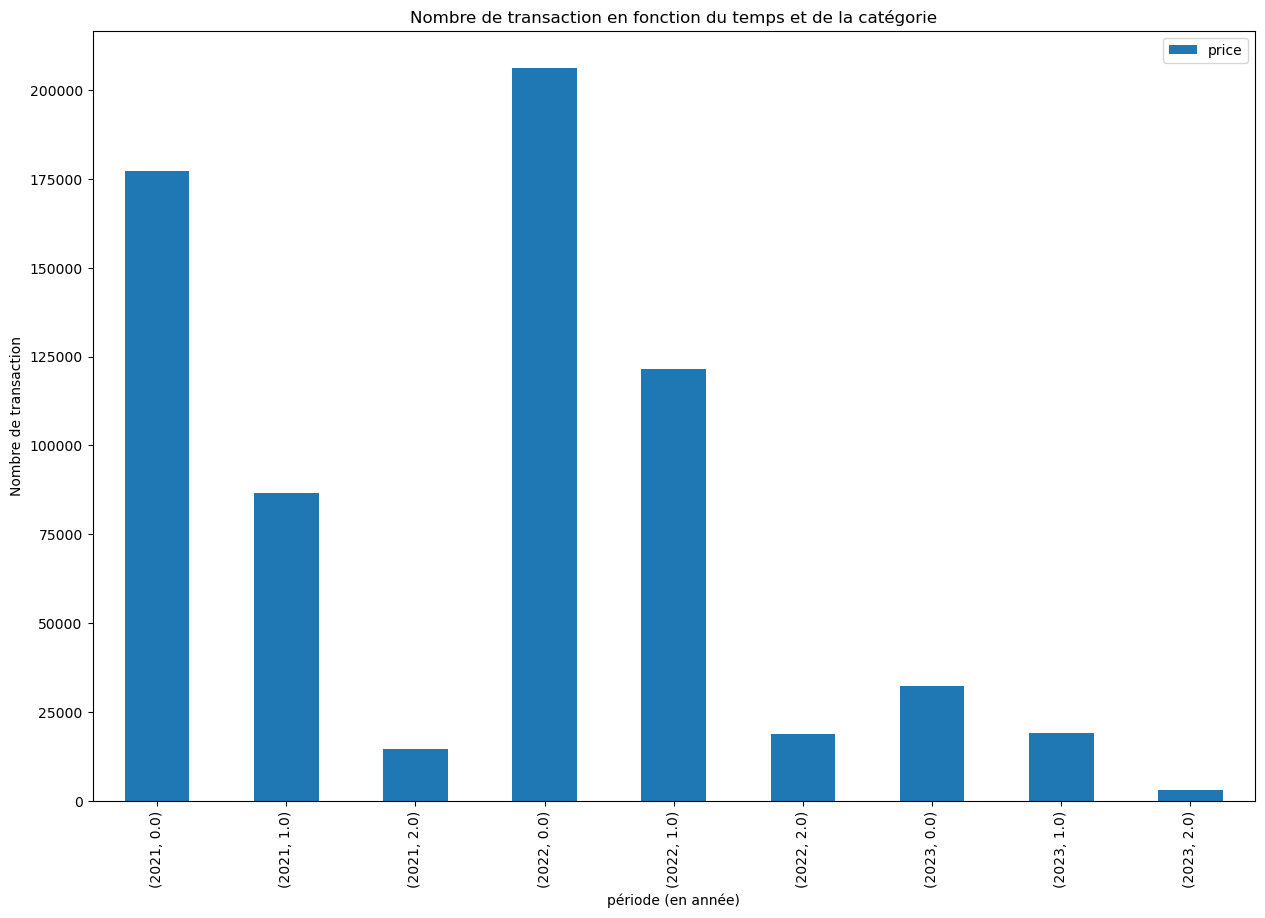

In [48]:
df_nbre_categ = df_lapage[['price','year', 'categ' ]].groupby (['year','categ']).count().plot.bar(figsize=(15,10))
plt.title('Nombre de transaction en fonction du temps et de la catégorie')
plt.xlabel('période (en année)')
plt. ylabel ('Nombre de transaction');
plt.show()

## CA par categorie

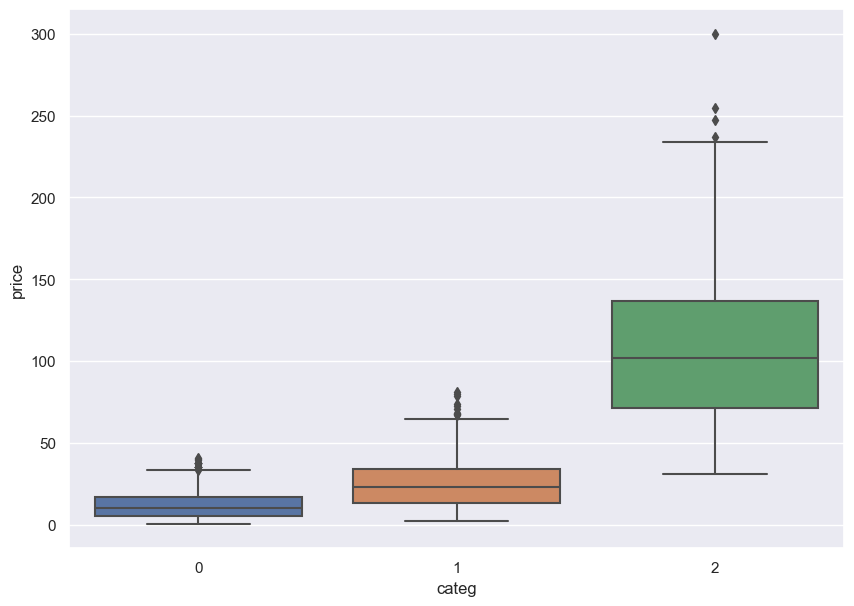

In [49]:
# visualisation de l'extension des prix produits par catégories

sns.set(rc={"figure.figsize":(10, 7)})
sns.boxplot(x='categ', y='price', data=prod);

In [50]:
# df chiffre d'affaire par catégorie & an

ca_categ = df_lapage[['price','year', 'categ' ]].groupby (['year','categ']).sum().reset_index()
ca_categ

year  categ       price
0  2021    0.0  1883945.26
1  2021    1.0  1777995.85
2  2021    2.0  1109810.26
3  2022    0.0  2194246.06
4  2022    1.0  2485275.19
5  2022    2.0  1430436.16
6  2023    0.0   343888.88
7  2023    1.0   390451.65
8  2023    2.0   240028.60

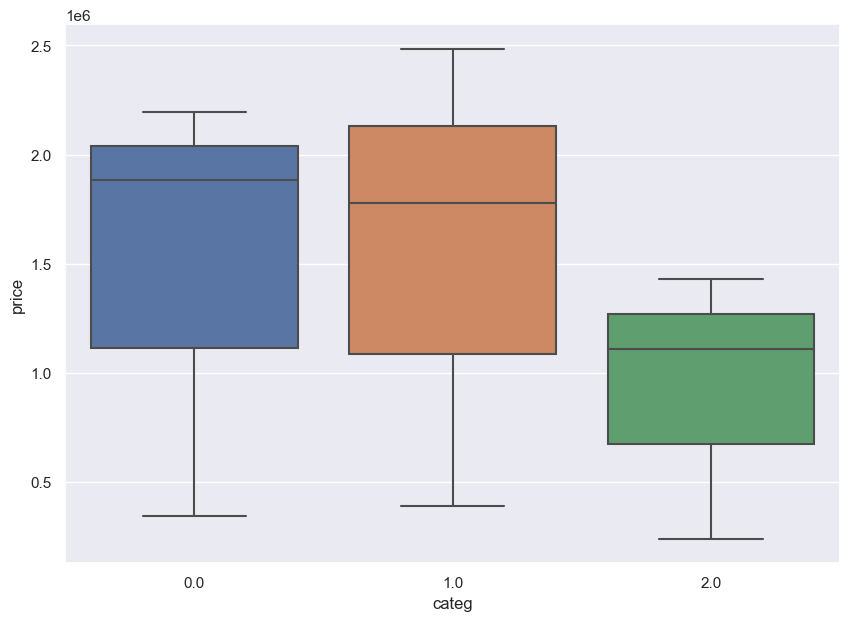

In [51]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.boxplot(x='categ', y='price', data=ca_categ);

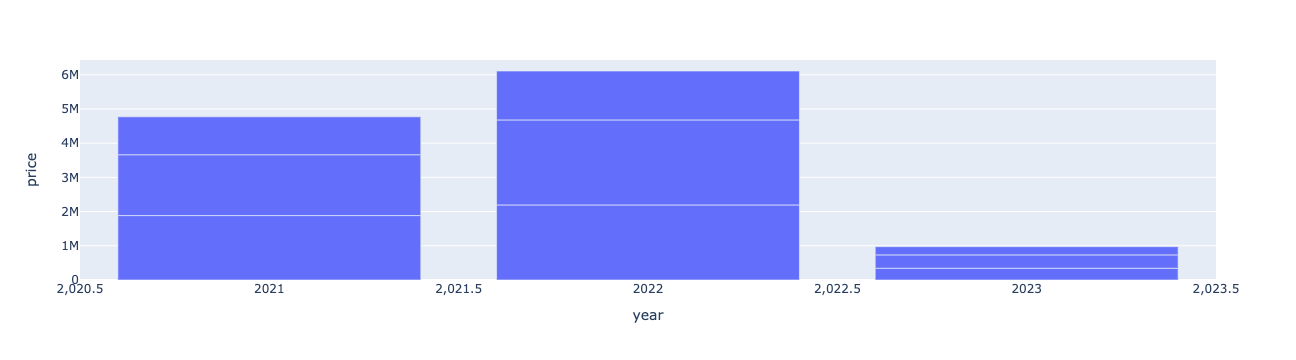

In [52]:
# représentation du CA catégorie par année

px.bar(ca_categ,
        y="price",
        x="year")

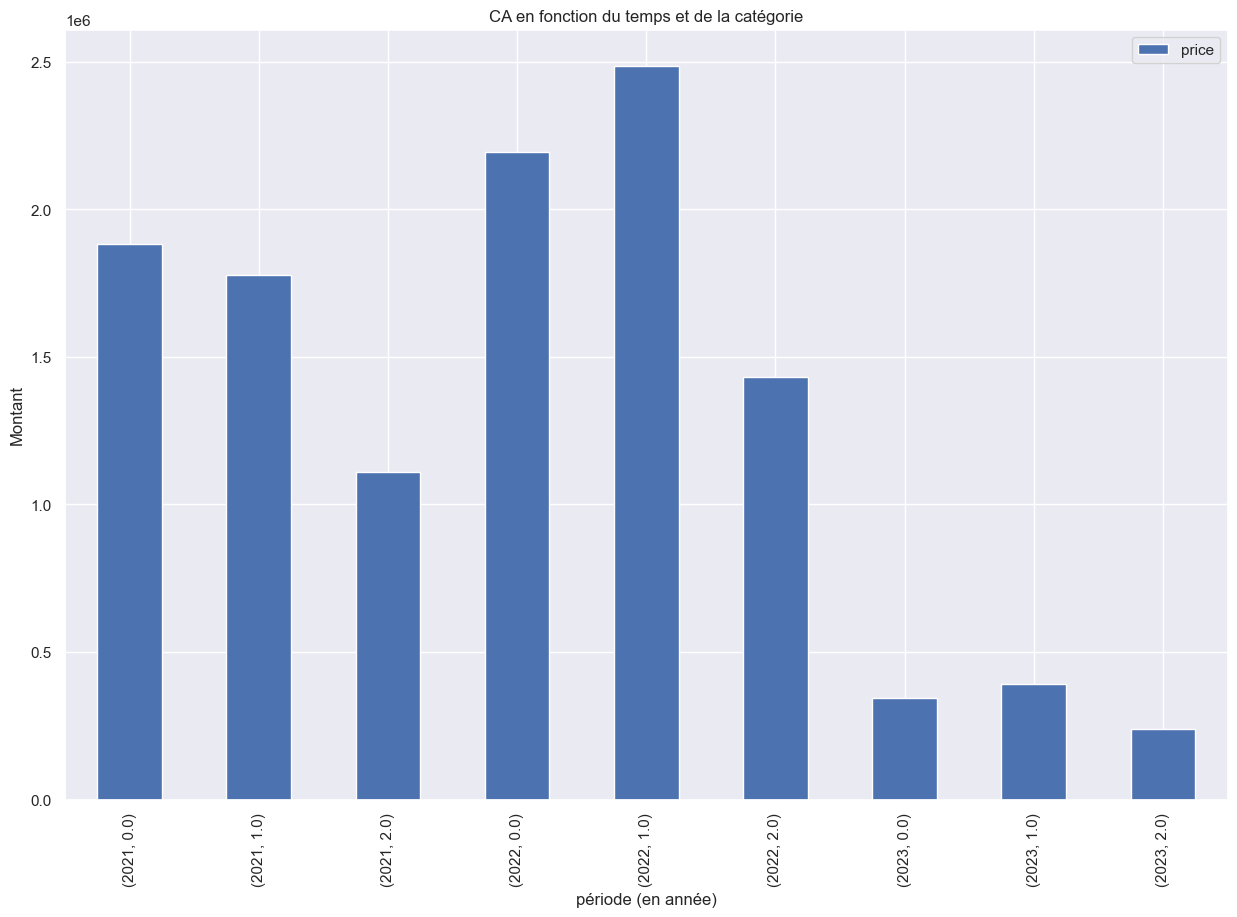

In [53]:
# Visualisation du CA par catégorie par an 

df_lapage[['price','year', 'categ' ]].groupby(['year','categ']).sum().plot.bar(figsize=(15,10))
plt.title('CA en fonction du temps et de la catégorie')
plt.xlabel('période (en année)')
plt. ylabel ('Montant');


## Determination du nombre d'achat selon le genre et par an

In [54]:
lapage_genre = pd.pivot_table(df_lapage.reset_index(),index='sex', columns='year', values='session_id',
                              aggfunc='count', margins = False)
lapage_genre

year    2021    2022   2023
sex                        
f     138125  172992  27285
m     140210  173508  27212

In [55]:
lapage_genre_sess = df_lapage[['year', 'sex','session_id' ]].groupby (['year','sex']).count().reset_index()
lapage_genre_sess

year sex  session_id
0  2021   f      138125
1  2021   m      140210
2  2022   f      172992
3  2022   m      173508
4  2023   f       27285
5  2023   m       27212

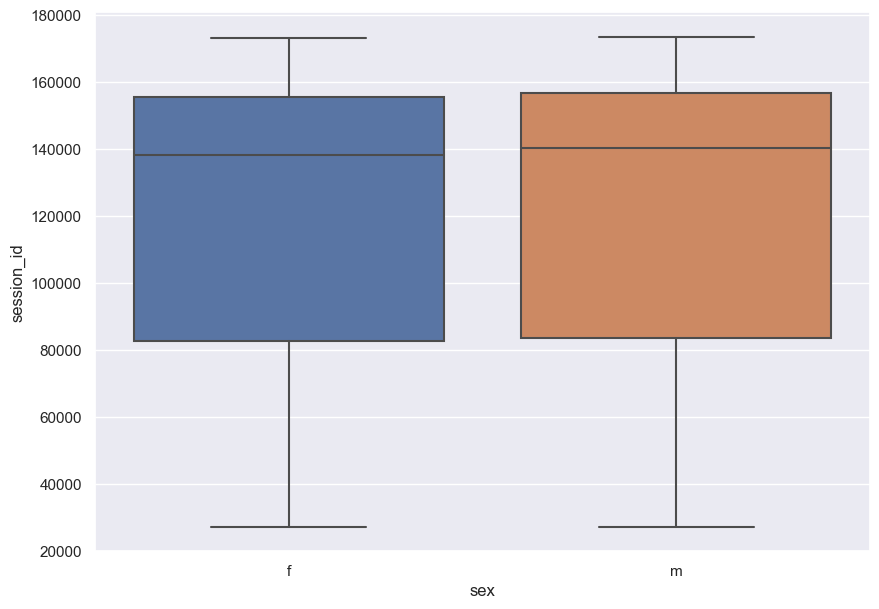

In [56]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.boxplot(x='sex', y='session_id', data=lapage_genre_sess);

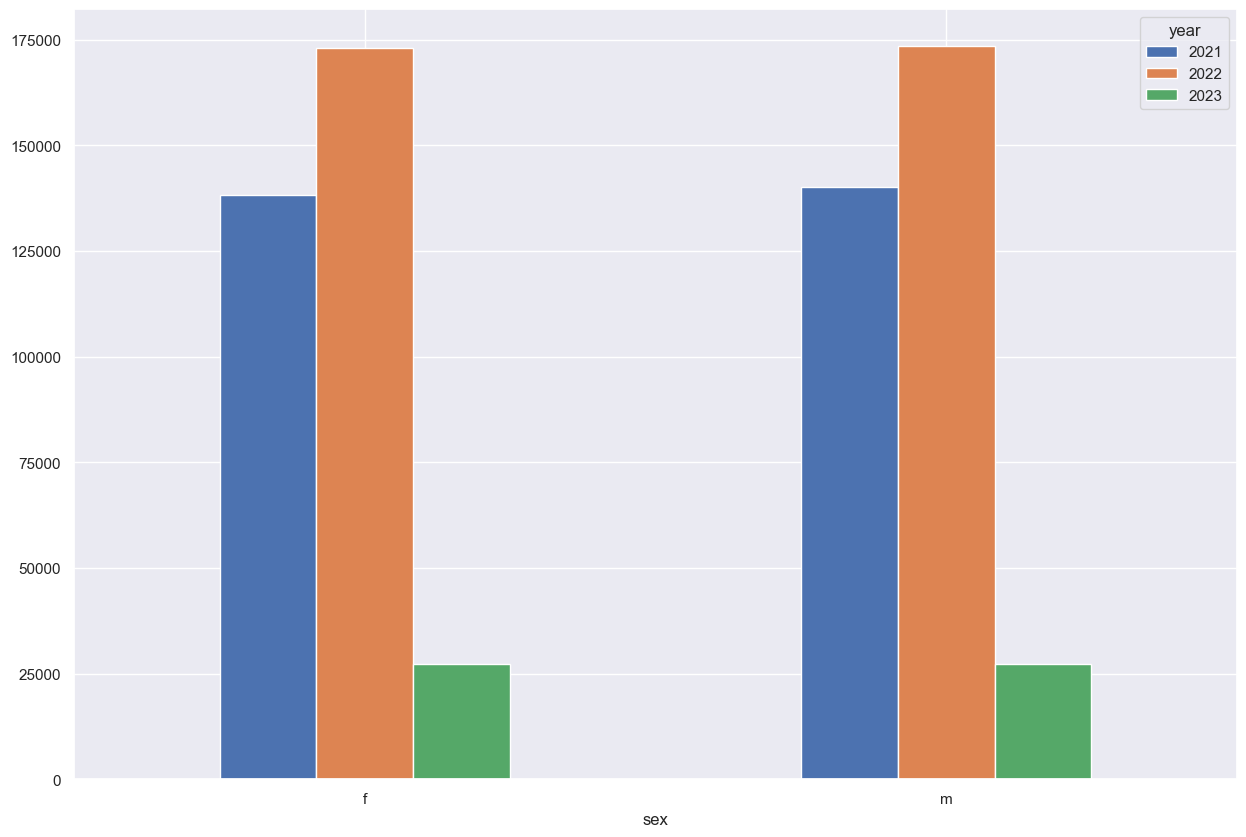

In [57]:
lapage_genre.plot.bar(figsize=(15,10))
plt.xticks(rotation=0);

## Chiffre d'affaire selon la tranche d'age

In [58]:
# Creation d'une colonne Age

todays_date = date.today()
todays_date

df_lapage['age'] = todays_date.year - df_lapage['birth']

In [59]:
# Tranche d'age des clients 

bins = [18, 25, 40, 60, 70, 120]
labels = ['18-24', '25-39', '40-59', '60-69', '70+']
df_lapage["tranche_age"] = pd.cut(df_lapage['age'], bins=bins, labels=labels, right=False)
df_lapage

# 2eme methode

#def ageIntervale(age):
 #   if age < 12:
  #    return '[-12ans]'
   # elif age >= 12 and age < 17:
    #  return '[12-17ans]'
    #elif age >= 18 and age < 24:
     # return '[18-24ans]'
    #elif age >= 25 and age < 39:
     # return '[25-39ans]'
    #elif age >= 40 and age < 59:
     # return '[40-59ans]'
    #elif age >= 60 and age < 69:
     # return '[60-69ans]'
    #elif age >= 70:
     # return '[70ans et +]'

#df_lapage['tranche_age']= df_lapage['age'].apply(ageIntervale)
#df_lapage.head()


date id_prod session_id client_id   price  categ sex   birth  \
0      2022-05-20  0_1518   s_211425     c_103    4.18    0.0   f  1986.0   
1      2021-07-20  0_1518    s_64849     c_103    4.18    0.0   f  1986.0   
2      2022-08-20  0_1518   s_255965     c_103    4.18    0.0   f  1986.0   
3      2022-06-18  0_1418   s_225411     c_103    8.57    0.0   f  1986.0   
4      2021-08-18  0_1418    s_77214     c_103    8.57    0.0   f  1986.0   
...           ...     ...        ...       ...     ...    ...  ..     ...   
679327 2021-07-23   2_147    s_65994    c_4391  181.99    2.0   f  2001.0   
679328 2022-03-25   0_142   s_184472    c_1232   19.85    0.0   f  1960.0   
679329 2021-09-25   0_142    s_95415    c_1232   19.85    0.0   f  1960.0   
679330 2021-03-11   2_205     s_4605    c_7534  100.99    2.0   m  1992.0   
679331 2022-07-11   2_205   s_236636    c_7534  100.99    2.0   m  1992.0   

        year  month  day   age tranche_age  
0       2022      5   20  36.0       25-39  
1       2021      7   20  36.0       25-39  
2       2022      8   20  36.0       25-39  
3       2022      6   18  36.0       25-39  
4       2021      8   18  36.0       25-39  
...      ...    ...  ...   ...         ...  
679327  2021      7   23  21.0       18-24  
679328  2022      3   25  62.0       60-69  
679329  2021      9   25  62.0       60-69  
679330  2021      3   11  30.0       25-39  
679331  2022      7   11  30.0       25-39  

[679332 rows x 13 columns]

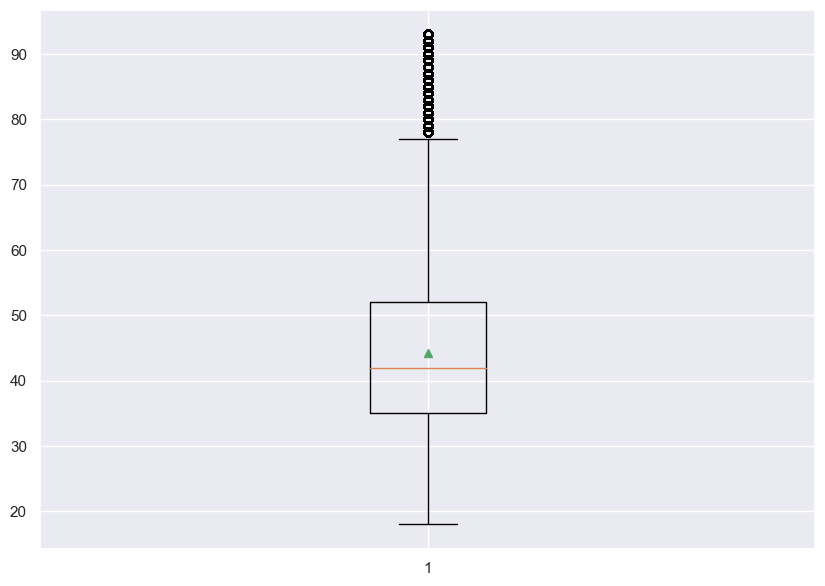

In [60]:
# Visualisation de la repartition de l'age

plt.boxplot(df_lapage['age'], showmeans = True);

In [61]:
# CA selon la tranche d'age

l_age = ['tranche_age', 'price']

CA_age = df_lapage[l_age].groupby(df_lapage['tranche_age']).sum().sort_values(
    by='tranche_age', ascending = False).reset_index()
CA_age['%']= round(CA_age['price']/CA_age['price'].sum()*100,2)
CA_age

tranche_age       price      %
0         70+   571112.24   4.82
1       60-69   939618.10   7.93
2       40-59  4727786.27  39.88
3       25-39  3609572.31  30.44
4       18-24  2007988.99  16.94

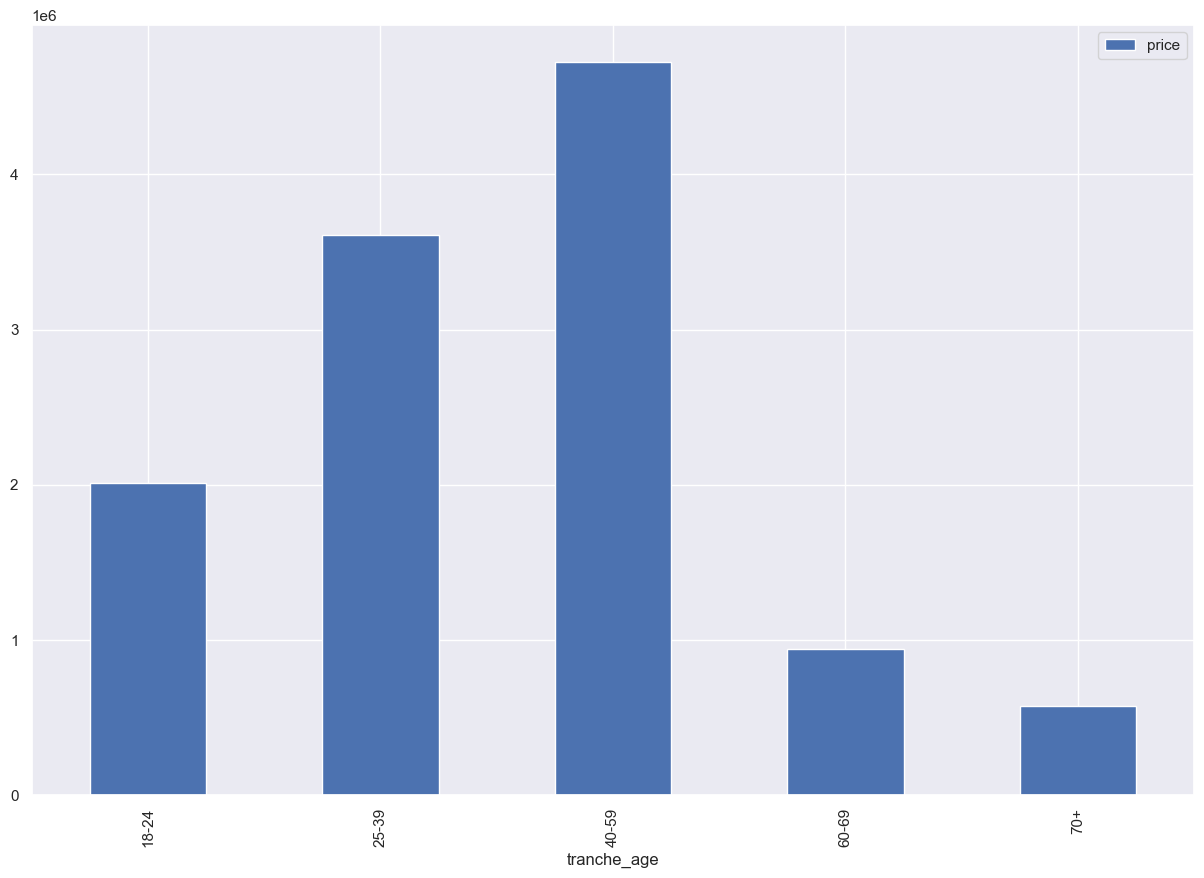

In [62]:
df_lapage[l_age].groupby(df_lapage['tranche_age']).sum().sort_values(
    by='tranche_age', ascending = True).plot.bar(figsize=(15,10));

Chiffre d'affaire par tranche d'age : 


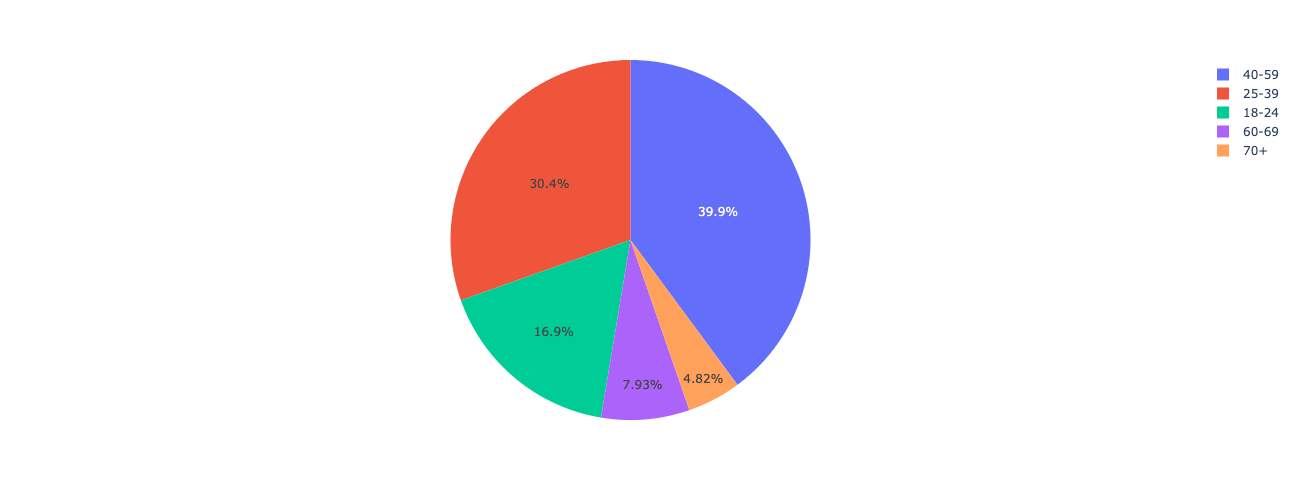

In [63]:
y = (16.94, 30.44, 39.88, 7.93, 4.82)

labels = ["18-24","25-39","40-59", "60-69", "70+"]

print("Chiffre d'affaire par tranche d'age : ")


fig = px.pie(values=y, names=labels, width=600, height=500)
fig.show()

In [64]:
#calcul Spearman et p-value
rho, p = spearmanr(df_lapage['tranche_age'], df_lapage['price'])

#print Spearman et p-value
print(rho)

print(p)

-0.07222743453158172
0.0


# Moyenne mobile

In [65]:
#Creation d'un df avec les valeurs par mois

df_ma = df_lapage.groupby('date').sum().reset_index().sort_values(
    by= "date", ascending = True)

In [66]:
df_ma

date     price  categ      birth     year  month    day      age
0   2021-03-01  16575.85  427.0  1904339.0  1946223   2889    963  42847.0
1   2021-03-02  15497.08  362.0  1858984.0  1899740   2820   1880  41696.0
2   2021-03-03  15198.69  360.0  1801708.0  1841131   2733   2733  40334.0
3   2021-03-04  15196.07  383.0  1785123.0  1824963   2709   3612  40743.0
4   2021-03-05  17471.37  433.0  1865533.0  1905803   2829   4715  41213.0
..         ...       ...    ...        ...      ...    ...    ...      ...
725 2023-02-24  15207.89  365.0  1767989.0  1808562   1788  21456  39679.0
726 2023-02-25  15761.25  493.0  1790355.0  1830815   1810  22625  39555.0
727 2023-02-26  16304.72  435.0  1759258.0  1800470   1780  23140  40322.0
728 2023-02-27  19170.81  482.0  2195850.0  2245530   2220  29970  48570.0
729 2023-02-28  18105.15  539.0  1900888.0  1944103   1922  26908  42254.0

[730 rows x 8 columns]

In [67]:
# Creation de colonnes avec la moyenne mobile sur 1 et 3 mois

df_ma['MA 30 days']= df_ma['price'].rolling(30, center = True).mean()
df_ma['MA 90 days']= df_ma['price'].rolling(90, center = True).mean()
df_ma['MA 180 days']= df_ma['price'].rolling(180, center = True).mean()

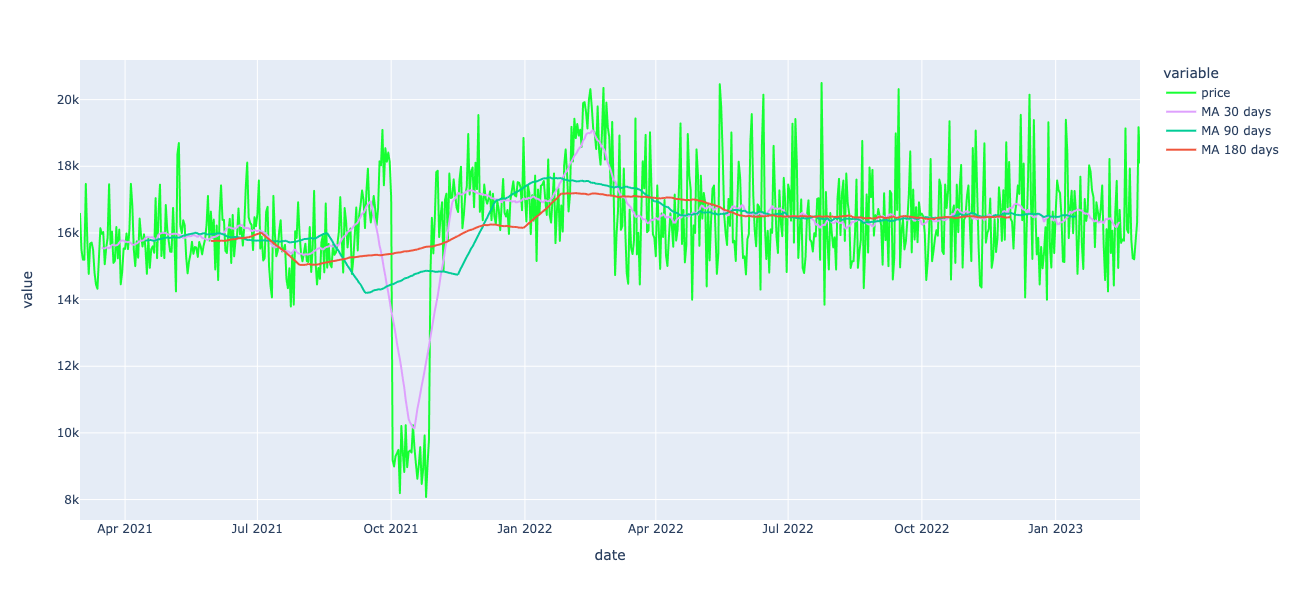

In [68]:
px.line(df_ma, x='date', y =['price', 'MA 30 days','MA 90 days','MA 180 days'],color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
                 px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[1]]
                ,width=1150, height=600)

In [69]:
# création d'un df avec les valeurs lissé ( sans le mois 10/2021)

df_ma_smooth = df_lapage_smooth.groupby('date').sum().reset_index().sort_values(
    by= "date", ascending = True)
df_ma_smooth

date  year  month  categ  price
0   2021-03-01  6063      9    3.0    963
1   2021-03-02  6063      9    3.0    940
2   2021-03-03  6063      9    3.0    911
3   2021-03-04  6063      9    3.0    903
4   2021-03-05  6063      9    3.0    943
..         ...   ...    ...    ...    ...
694 2023-02-24  6069      6    3.0    894
695 2023-02-25  6069      6    3.0    905
696 2023-02-26  6069      6    3.0    890
697 2023-02-27  6069      6    3.0   1110
698 2023-02-28  6069      6    3.0    961

[699 rows x 5 columns]

In [70]:
df_ma_smooth.loc[df_ma_smooth["month"] == 10]

Empty DataFrame
Columns: [date, year, month, categ, price]
Index: []

In [71]:
# Creation de colonnes avec la moyenne mobile sur 1 et 3 mois

df_ma_smooth['MA 30']= df_ma_smooth['price'].rolling(30, center = True).mean()
df_ma_smooth['MA 90']= df_ma_smooth['price'].rolling(90, center = True).mean()
df_ma_smooth['MA 180']= df_ma_smooth['price'].rolling(180, center = True).mean()

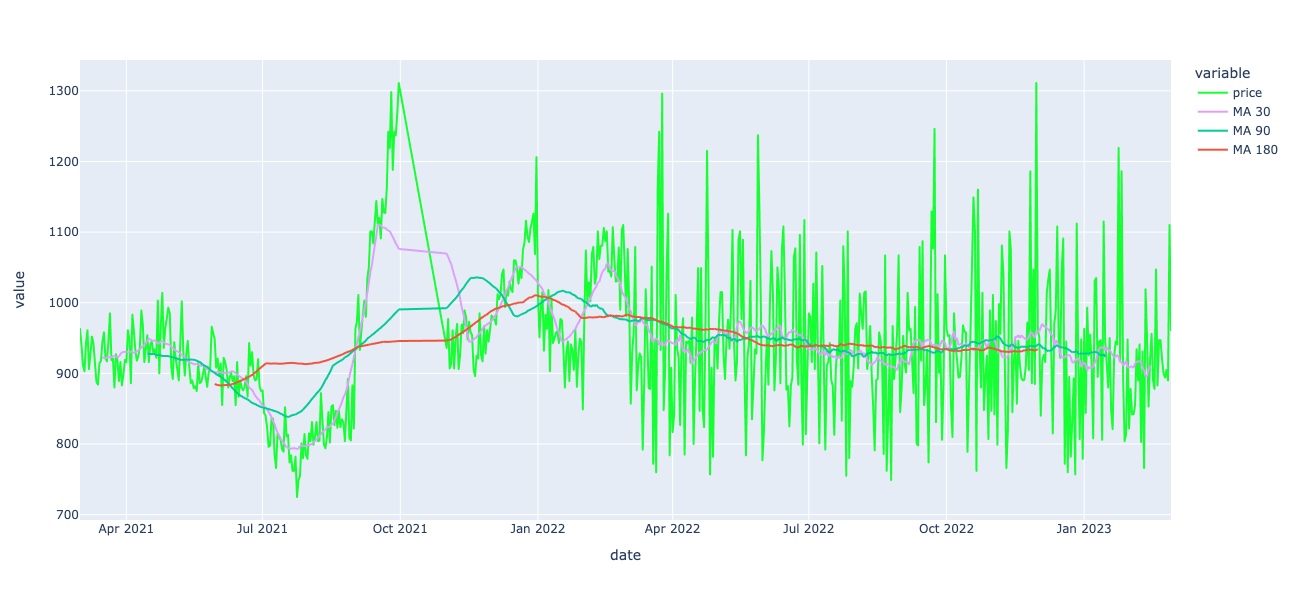

In [72]:
px.line(df_ma_smooth, x='date', y =['price', 'MA 30','MA 90','MA 180'],color_discrete_sequence=[
                 px.colors.qualitative.Alphabet[6],
                 px.colors.qualitative.Alphabet[11],
                 px.colors.qualitative.Plotly[2],
                 px.colors.qualitative.Plotly[1]]
                ,width=1150, height=600)

# Top et flop des références

In [73]:
# Flop 5 références

ref_flop = df_lapage.groupby(df_lapage['id_prod']).sum().sort_values(
    by = 'price', ascending = True).head()
ref_flop = ref_flop.drop(['categ','birth', 'year', 'month', 'day', 'age'], axis=1)
ref_flop


price
id_prod       
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_807     1.99

In [74]:
# Top 5 références

ref_top = df_lapage.groupby(df_lapage['id_prod']).sum().sort_values(
    by = 'price', ascending = False).head()
ref_top = ref_top.drop(['categ','birth', 'year', 'month', 'day', 'age'], axis=1)
ref_top


price
id_prod          
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86

In [75]:
# creation d'un df avec le montant d'achat client

L = ['client_id', 'price']
vente = df_lapage[L].groupby('client_id').sum().sort_values(by= 'price')
vente

price
client_id           
c_8351          6.31
c_8140          8.30
c_8114          9.98
c_240          11.06
c_4648         11.20
...              ...
c_3263       5276.87
c_3454     113669.82
c_6714     153662.70
c_4958     289760.34
c_1609     324033.35

[8600 rows x 1 columns]

In [76]:
# top clients

vente.nlargest(5,'price') 

price
client_id           
c_1609     324033.35
c_4958     289760.34
c_6714     153662.70
c_3454     113669.82
c_3263       5276.87

In [77]:
# Flop clients

vente.nsmallest(5,'price') 

price
client_id       
c_8351      6.31
c_8140      8.30
c_8114      9.98
c_240      11.06
c_4648     11.20

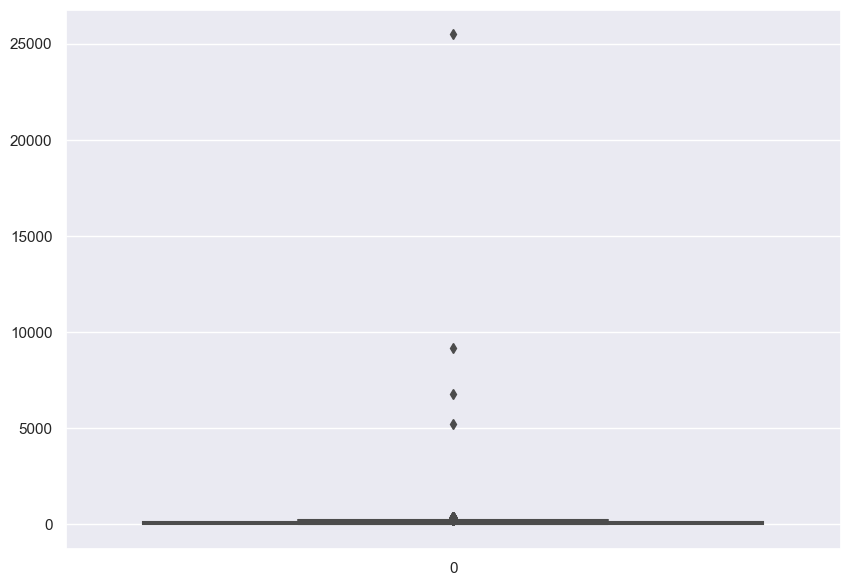

In [78]:
# Visualisation des comptes clients

df_client_id = df_lapage[['client_id','price' ]].groupby (['client_id']).count().sort_values(
                                                                by= 'price', ascending =False)
plt.figure(figsize=(10,7))
sns.boxplot(df_client_id['price']);

# Courbe de lorenz

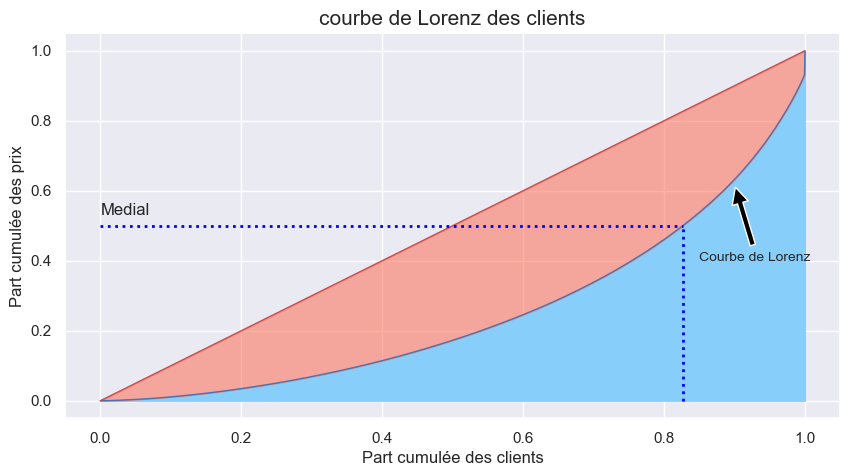

L indice de Gini est de 0.395 , ce qui signifie qu'on a une r épartition du chiffre-d'affaires plutôt égalitaire


In [79]:
# Calcul de la courbe de lorenz sur les clients et le CA

lorenz = df_lapage[['client_id', 'price']]

# Non droite = non égalitaire
lorenz_client = lorenz.groupby('client_id').count()
lorenz_client = lorenz_client.price.values
c = len(lorenz_client)
lorenz_client = np.cumsum(np.sort(lorenz_client)) / lorenz_client.sum()
lorenz_client = np.append([0], lorenz_client)
n = len(df_lapage.client_id)

# Affichage de la courbe et de la droite xaxis

xm = np.linspace(0-1/c,1+1/c,c+1)
plt.figure(figsize= (10,5))
plt.grid(True)
plt.plot(xm,lorenz_client, "b", linewidth=1)
plt.fill_between(xm,lorenz_client,0,color='lightskyblue')
plt.plot([0,1], [0,1], "r", linewidth=1)
plt.fill_between(xm, xm, lorenz_client, color='tomato', alpha=0.5)
plt.xlabel('Part cumulée des clients', fontsize = 12)
plt.ylabel('Part cumulée des prix', fontsize = 12)
plt.annotate('Courbe de Lorenz', xy=(0.9, 0.62), xytext=(0.85, 0.4), 
             arrowprops={'facecolor':'black', 'shrink':0.05}, fontsize = 10 )

# Calcul et visu de la médiale

medialc = len(lorenz_client[lorenz_client <= 0.5]) / len(lorenz_client)
plt.plot([0, medialc], [0.5, 0.5], 'blue', linestyle=':', linewidth=2, label="Medial")
plt.plot([medialc, medialc], [0, 0.5], 'blue', linestyle=':', linewidth=2)
plt.annotate('Medial', xy=(0, 0.5), xytext=(0, 0.53),  fontsize = 12 )

plt.title('courbe de Lorenz des clients', fontsize = 15)
plt.show()

# calcul du coef de gini

df_lapage[['client_id', 'price']]
df_cust_price = df_lapage[['client_id', 'price']]


def gini(df_cust_price):
    sorted_list = sorted(df_cust_price)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(df_cust_price) / 2.
    return (fair_area - area) / fair_area

print('\33[1mL indice de Gini est de', round((gini(df_lapage['price'])),3), ', ce qui signifie qu\'on a une r épartition du chiffre-d\'affaires plutôt égalitaire')

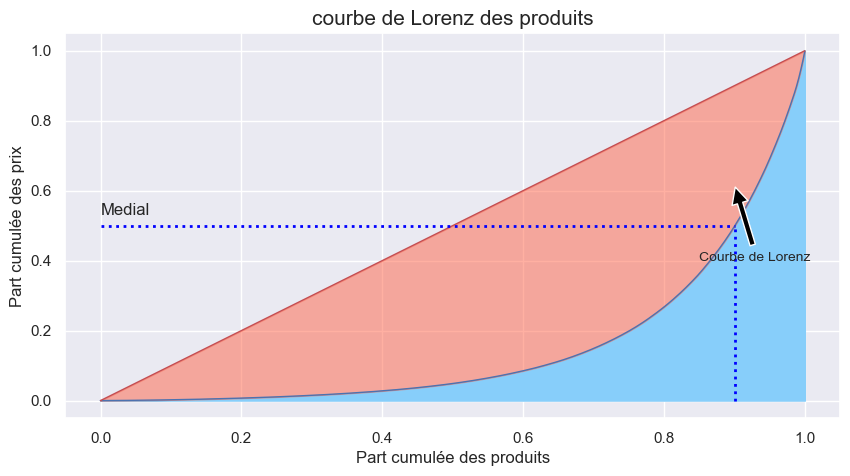

In [80]:
# Calcul de la courbe de lorenz sur les produits et le CA

lorenz = df_lapage[['id_prod', 'price']]

# Non droite = non égalitaire
lorenz_prod = lorenz.groupby('id_prod').count()
lorenz_prod = lorenz_prod.price.values
c = len(lorenz_prod)
lorenz_prod = np.cumsum(np.sort(lorenz_prod)) / lorenz_prod.sum()
lorenz_prod = np.append([0], lorenz_prod)
n = len(df_lapage.id_prod)

# Affichage de la courbe et de la droite xaxis

xm = np.linspace(0-1/c,1+1/c,c+1)
plt.figure(figsize= (10,5))
plt.grid(True)
plt.plot(xm,lorenz_prod, "b", linewidth=1)
plt.fill_between(xm,lorenz_prod,0,color='lightskyblue')
plt.plot([0,1], [0,1], "r", linewidth=1)
plt.fill_between(xm, xm, lorenz_prod, color='tomato', alpha=0.5)
plt.xlabel('Part cumulée des produits', fontsize = 12)
plt.ylabel('Part cumulée des prix', fontsize = 12)
plt.annotate('Courbe de Lorenz', xy=(0.9, 0.62), xytext=(0.85, 0.4), 
             arrowprops={'facecolor':'black', 'shrink':0.05}, fontsize = 10 )

# Calcul et visu de la médiale

medialc = len(lorenz_prod[lorenz_prod <= 0.5]) / len(lorenz_prod)
plt.plot([0, medialc], [0.5, 0.5], 'blue', linestyle=':', linewidth=2, label="Medial")
plt.plot([medialc, medialc], [0, 0.5], 'blue', linestyle=':', linewidth=2)
plt.annotate('Medial', xy=(0, 0.5), xytext=(0, 0.53),  fontsize = 12 )

plt.title('courbe de Lorenz des produits', fontsize = 15)
plt.show()

# Corrélation entre les différentes variables

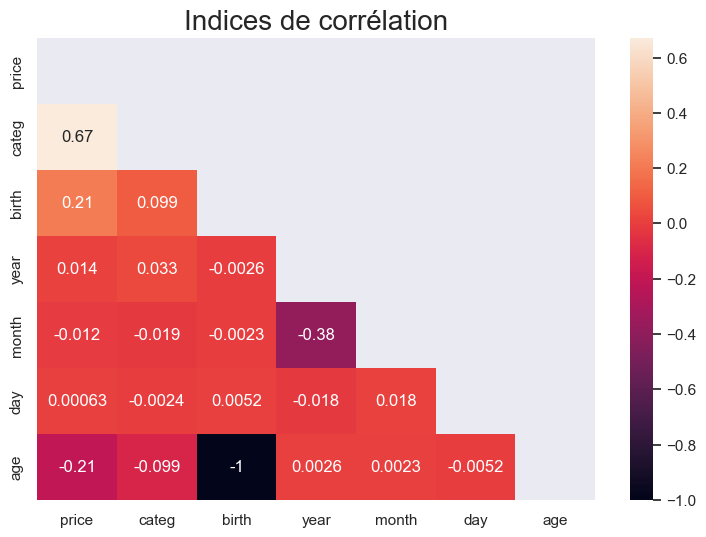

In [81]:
plt.figure(figsize=(9,6))
plt.title('Indices de corrélation', fontsize=20)

corr_matrix=df_lapage.corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask,annot= True);



On constate une forte corrélation entre la catégorie du produit et son prix

En revanche, on note une faible corrélation entre l'âge du client et la catégorie achetée

On note une corrélation moyenne entre l'âge du client et le prix du produit

# Corrélation entre le genre d’un client et les catégories des livres achetés 

In [82]:
my_crosstab=pd.crosstab(df_lapage.sex, df_lapage.categ,margins=False)
my_crosstab

categ     0.0     1.0    2.0
sex                         
f      206220  114899  17283
m      209460  112270  19200

In [83]:
#calcul Spearman et  p-value

rho, p = spearmanr(df_lapage['sex'], df_lapage['categ'])

#Spearman et p-value

print(rho)

print(p)

-0.002712030974593925
0.025397706338629866


In [84]:
contingency, results = rp.crosstab(df_lapage["sex"], df_lapage["categ"],
                                   prop = "cell", 
                                   test = "chi-square")

In [85]:
contingency

categ                     
categ    0.0    1.0   2.0     All
sex                              
f      30.36  16.91  2.54   49.81
m      30.83  16.53  2.83   50.19
All    61.19  33.44  5.37  100.00

In [86]:
results

Chi-square test   results
0  Pearson Chi-square ( 2.0) =   147.0025
1                    p-value =     0.0000
2                 Cramer's V =     0.0147

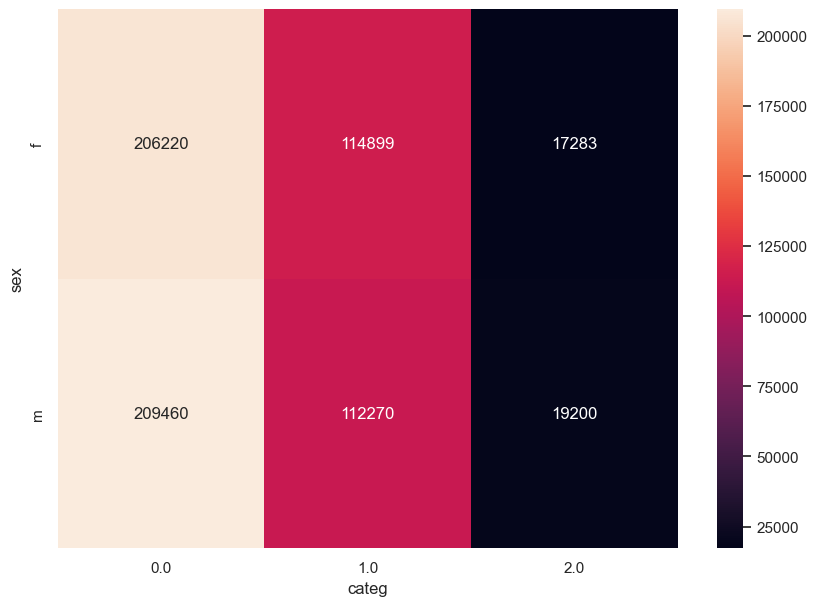

In [87]:
plt.figure(figsize = (10,7))
ax=sns.heatmap(my_crosstab, annot = True, fmt = 'd');

# Corrélation entre l’âge des clients et le montant total des achats

In [88]:
dfage=df_lapage.groupby(['age'])[['price']].sum().reset_index()
dfage.sort_values(by = 'price', ascending = False)

age      price
24  42.0  613657.10
0   18.0  609013.69
5   23.0  489497.54
25  43.0  334427.17
16  34.0  330813.88
..   ...        ...
72  90.0    5043.19
69  87.0    4804.18
74  92.0    4013.87
75  93.0    3221.85
73  91.0    2815.45

[76 rows x 2 columns]

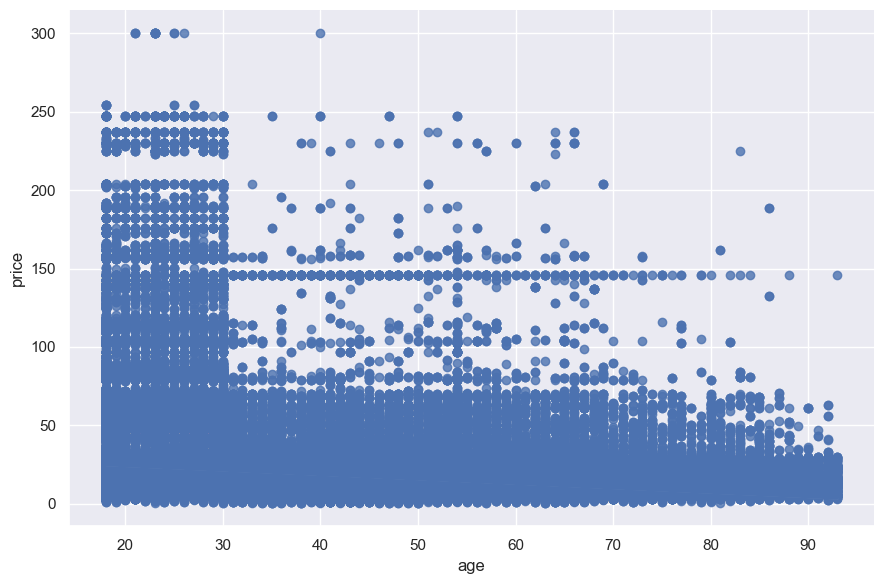

In [89]:
# Nombre d'achat selon l'age

sns.lmplot(x='age',y='price',data= df_lapage,height=6, aspect=1.5);

In [90]:
stats.pearsonr(df_lapage['age'], df_lapage['price'])

PearsonRResult(statistic=-0.20943869065277984, pvalue=0.0)

In [91]:
#calcul Spearman et  p-value
rho, p = spearmanr(dfage['age'], dfage['price'])

#Spearman et p-value
print(rho)

print(p)

-0.8576076555023923
4.57972879340901e-23


In [92]:
# Calcul selon la methode kruskal wallis

stats.kruskal(dfage['age'],dfage['price'])

KruskalResult(statistic=113.25490196078431, pvalue=1.8974423235695292e-26)

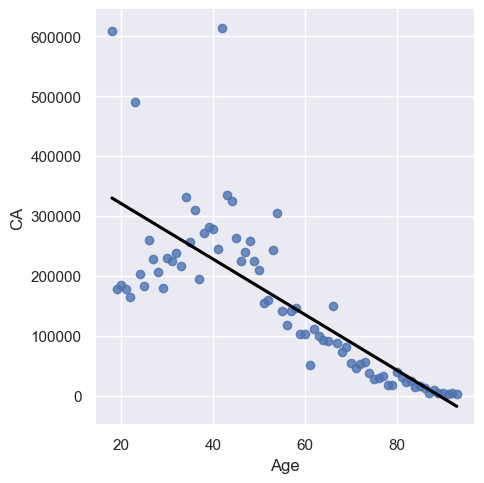

In [93]:
ax = sns.lmplot(x='age', y='price', data = dfage,
                ci=None, line_kws={'color':'black'} )

ax.set(xlabel='Age', ylabel='CA')
plt.show()

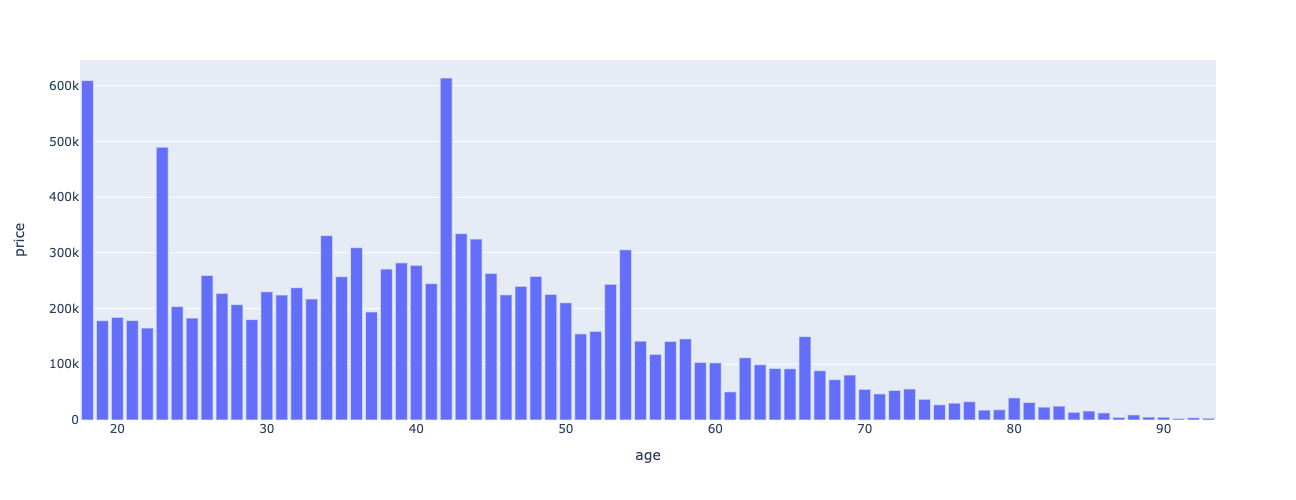

In [94]:
# CA par age

px.bar(dfage, x='age', y ='price',width=900, height=500)

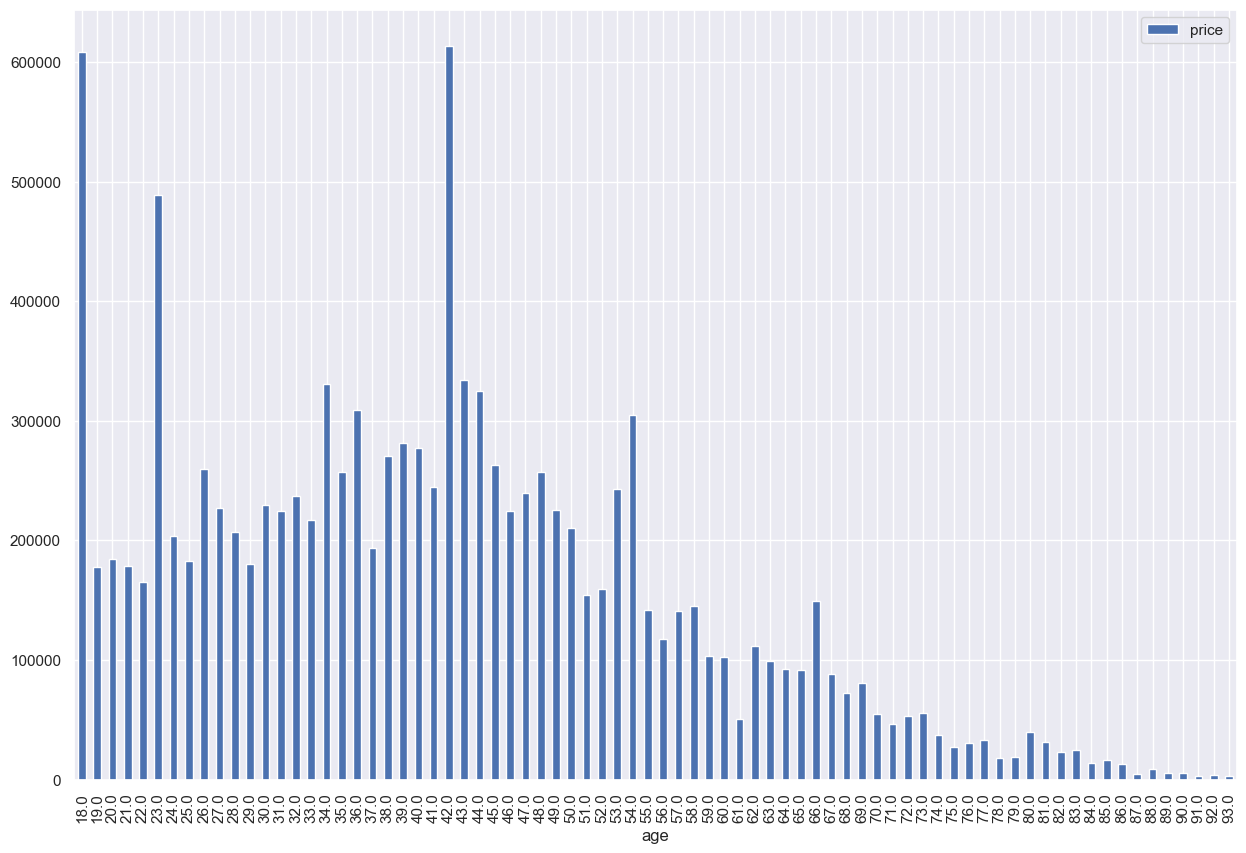

In [95]:
df_lapage.groupby(['age'])[['price']].sum().plot.bar(figsize=(15,10));

## Tranche d'age et montant total d'achat

In [96]:
dftrancheage=df_lapage.groupby(['tranche_age'])[['price']].sum().reset_index()
dftrancheage.sort_values(by = 'price', ascending = False)

tranche_age       price
2       40-59  4727786.27
1       25-39  3609572.31
0       18-24  2007988.99
3       60-69   939618.10
4         70+   571112.24

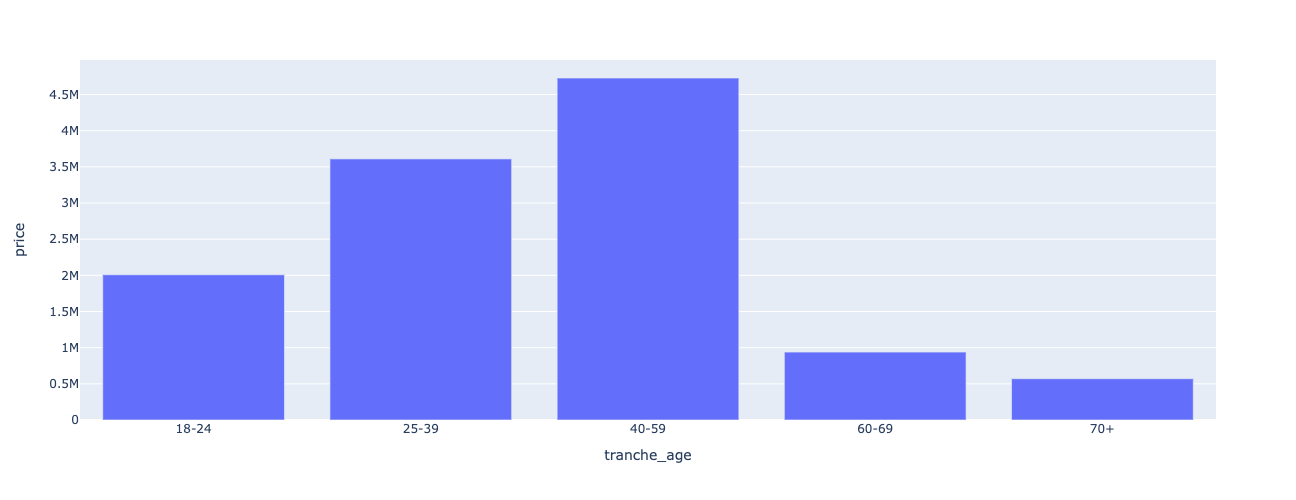

In [97]:
px.bar(dftrancheage, x='tranche_age', y ='price',width=900, height=500)

# Fréquence d'achat

   Frequence d'achat = nombre d'achat realise par client sur une periode donnée
   
                   = nombre total de commandes / nombre de clients
                     
   *un achat peut contenir plusieurs produits

In [98]:
# Nombre d'achat en moyenne par client

frequence_achat = round(len(df_lapage['session_id'].unique()) / len(df_lapage[('client_id')].unique()))
print('Un client réalise en moyenne', (frequence_achat), 'achats')

Un client réalise en moyenne 40 achats


In [99]:
# Fréquence d'achat selon l'age sur la période de données disponible

frequence_achat1 = df_lapage.groupby(by='age', as_index=False).agg({'session_id': pd.Series.nunique})
frequence_achat2 = df_lapage.groupby(by='age', as_index=False).agg({'client_id': pd.Series.nunique})
frequence_achat3 = frequence_achat1['session_id'] / frequence_achat2['client_id']
frequence_achat1['client_id'] = frequence_achat2['client_id']
frequence_achat1['frequence_achat'] = frequence_achat3
round(frequence_achat1, 2)

age  session_id  client_id  frequence_achat
0   18.0        8594        437            19.67
1   19.0        2567        145            17.70
2   20.0        2604        145            17.96
3   21.0        2431        125            19.45
4   22.0        2421        136            17.80
..   ...         ...        ...              ...
71  89.0         234          8            29.25
72  90.0         206          6            34.33
73  91.0          96          4            24.00
74  92.0         146          4            36.50
75  93.0         134          3            44.67

[76 rows x 4 columns]

In [100]:
frequence_achat1.drop(['session_id', 'client_id'], axis=1, inplace=True)

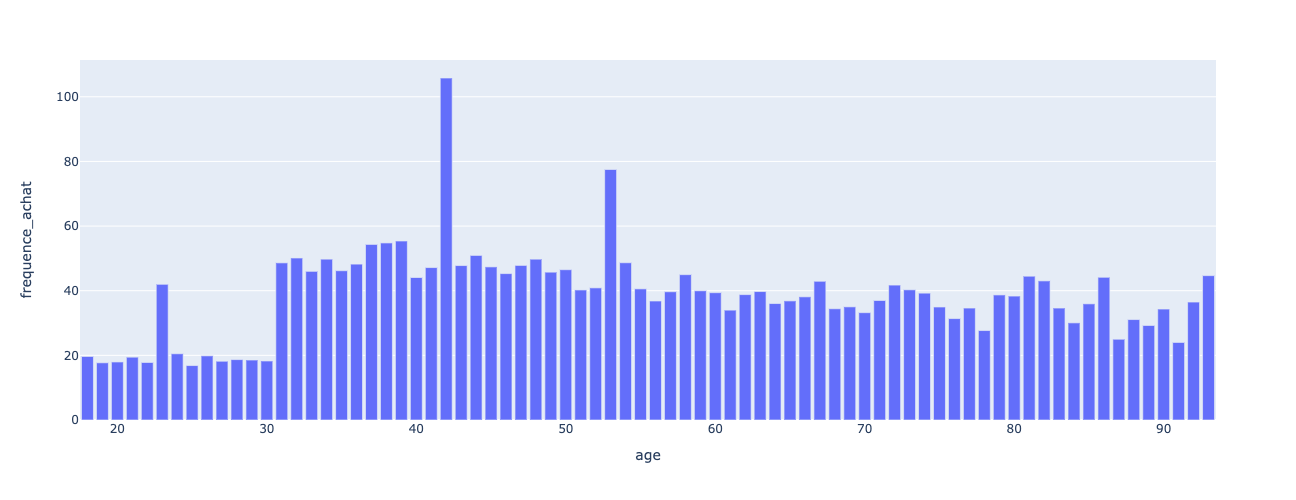

In [101]:
px.bar(frequence_achat1, x='age', y ='frequence_achat',width=900, height=500)

In [102]:
# Fréquence d'achat selon la tranche d'age 

frequence_achat11 = df_lapage.groupby(by='tranche_age', as_index=False).agg({'session_id': pd.Series.nunique})
frequence_achat22 = df_lapage.groupby(by='tranche_age', as_index=False).agg({'client_id': pd.Series.nunique})
frequence_achat33 = frequence_achat11['session_id'] / frequence_achat22['client_id']
frequence_achat11['client_id'] = frequence_achat22['client_id']
frequence_achat11['frequence_achat'] = frequence_achat33
round(frequence_achat11, 2)

tranche_age  session_id  client_id  frequence_achat
0       18-24       28102       1284            21.89
1       25-39       91330       2442            37.40
2       40-59      161129       3216            50.10
3       60-69       38048       1009            37.71
4         70+       23706        649            36.53

In [103]:
frequence_achat11.drop(['session_id', 'client_id'], axis=1, inplace=True)

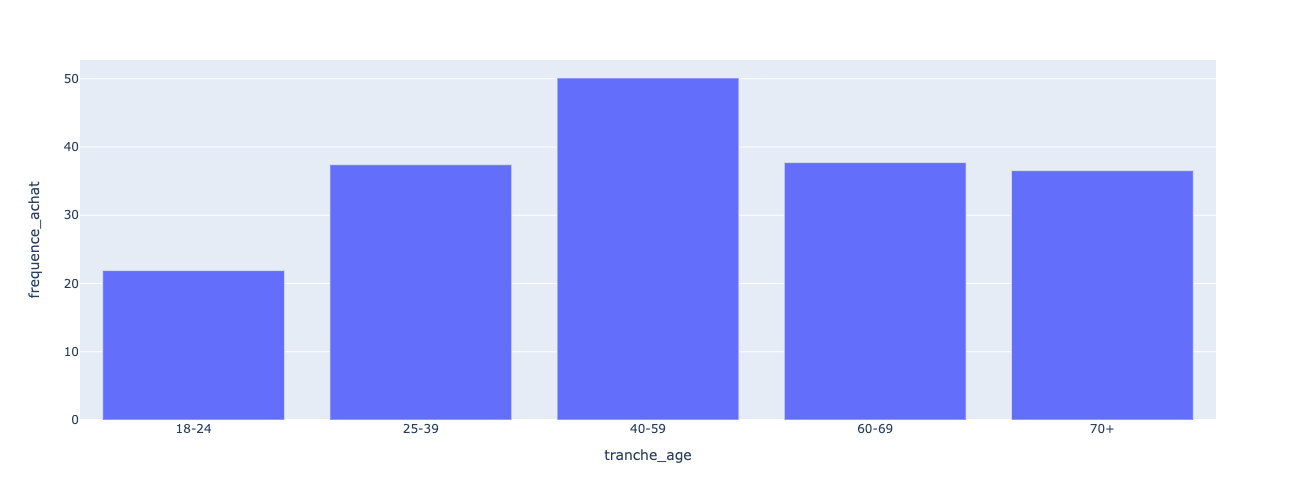

In [104]:
px.bar(frequence_achat11, x='tranche_age', y ='frequence_achat',width=900, height=500)

In [105]:
# Nombre d'achat par age

df_freq = df_lapage[['age','session_id']]
df_freq = df_freq.groupby('age').count().sort_values(by='age', ascending =True).reset_index()
df_freq

age  session_id
0   18.0       15149
1   19.0        4371
2   20.0        4587
3   21.0        4252
4   22.0        4415
..   ...         ...
71  89.0         327
72  90.0         311
73  91.0         170
74  92.0         226
75  93.0         201

[76 rows x 2 columns]

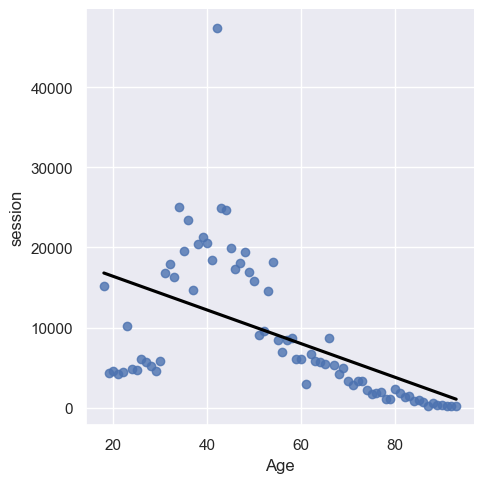

In [106]:
ax = sns.lmplot(x='age', y='session_id', data = df_freq, ci=None, line_kws={'color':'black'} )
ax.set(xlabel='Age', ylabel='session')
plt.show()

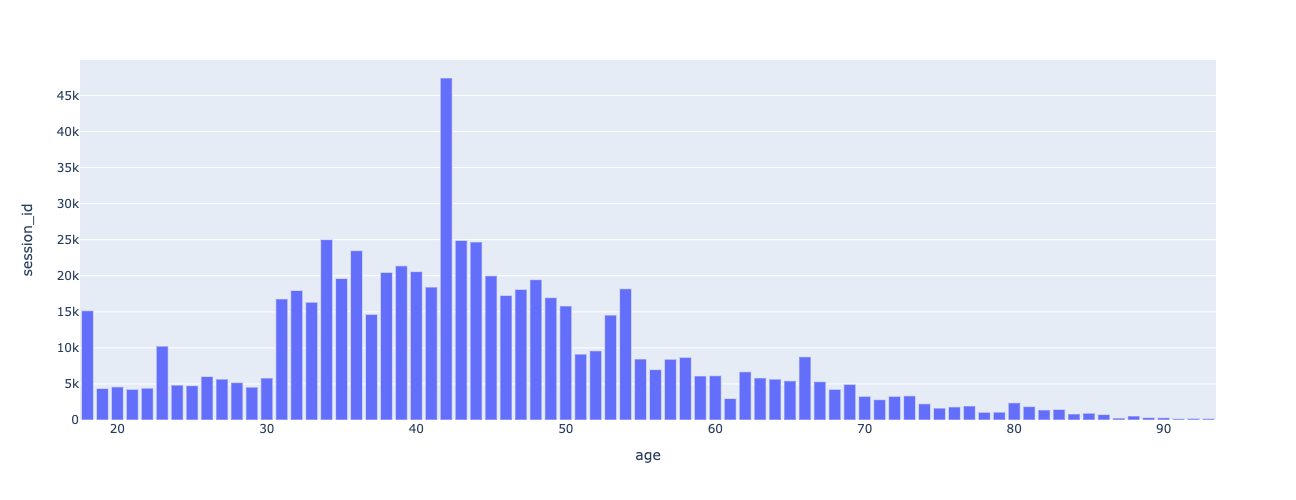

In [107]:
# Nombre de session d'achat par age

px.bar(df_freq, x='age', y ='session_id',width=1000, height=500)

## Fréquence d'achat sans les clients 'pro' (hypothese)

In [108]:
top_clients = df_lapage.groupby('client_id')[['price']].sum().sort_values(by='price', ascending=False).head(10)


les_4 =top_clients['price'].head(4).sum()
print ('Les 4 premiers clients apportent à eux-seuls un chiffre-d\'affaires de ', '{:,}' .format(round(les_4)).replace(',',' ')
,'€',' : Il s\'agit certainement de professionnels')

Les 4 premiers clients apportent à eux-seuls un chiffre-d'affaires de  881 126 €  : Il s'agit certainement de professionnels


In [109]:
df_client = df_lapage[['age','session_id','client_id']]
df_client

age session_id client_id
0       36.0   s_211425     c_103
1       36.0    s_64849     c_103
2       36.0   s_255965     c_103
3       36.0   s_225411     c_103
4       36.0    s_77214     c_103
...      ...        ...       ...
679327  21.0    s_65994    c_4391
679328  62.0   s_184472    c_1232
679329  62.0    s_95415    c_1232
679330  30.0     s_4605    c_7534
679331  30.0   s_236636    c_7534

[679332 rows x 3 columns]

In [110]:
df_client['client_id'].value_counts().head(10)

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
Name: client_id, dtype: int64

In [111]:
df_client=df_client[df_client.client_id != 'c_1609']
df_client=df_client[df_client.client_id != 'c_6714']
df_client=df_client[df_client.client_id != 'c_3454']
df_client=df_client[df_client.client_id != 'c_4958']

df_client['client_id'].value_counts().head(10)

c_3263    403
c_2140    402
c_2595    398
c_2077    384
c_1637    380
c_7421    379
c_8026    377
c_760     375
c_5953    374
c_1422    374
Name: client_id, dtype: int64

In [112]:
# Apres retrait des 4 gros clients

frequence_achat = round(len(df_client['session_id'].unique()) / len(df_client[('client_id')].unique()))
print('Un client réalise en moyenne', (frequence_achat), 'achats')

Un client réalise en moyenne 37 achats


In [113]:
# Fréquence d'achat selon l'age sur la période de données disponible

frequence_achat1 = df_client.groupby(by='age', as_index=False).agg({'session_id': pd.Series.nunique})
frequence_achat2 = df_client.groupby(by='age', as_index=False).agg({'client_id': pd.Series.nunique})
frequence_achat3 = frequence_achat1['session_id'] / frequence_achat2['client_id']
frequence_achat1['client_id'] = frequence_achat2['client_id']
frequence_achat1['frequence_achat'] = frequence_achat3
round(frequence_achat1, 2)

age  session_id  client_id  frequence_achat
0   18.0        8594        437            19.67
1   19.0        2567        145            17.70
2   20.0        2604        145            17.96
3   21.0        2431        125            19.45
4   22.0        2421        136            17.80
..   ...         ...        ...              ...
71  89.0         234          8            29.25
72  90.0         206          6            34.33
73  91.0          96          4            24.00
74  92.0         146          4            36.50
75  93.0         134          3            44.67

[76 rows x 4 columns]

In [114]:
frequence_achat1.drop(['session_id', 'client_id'], axis=1, inplace=True)

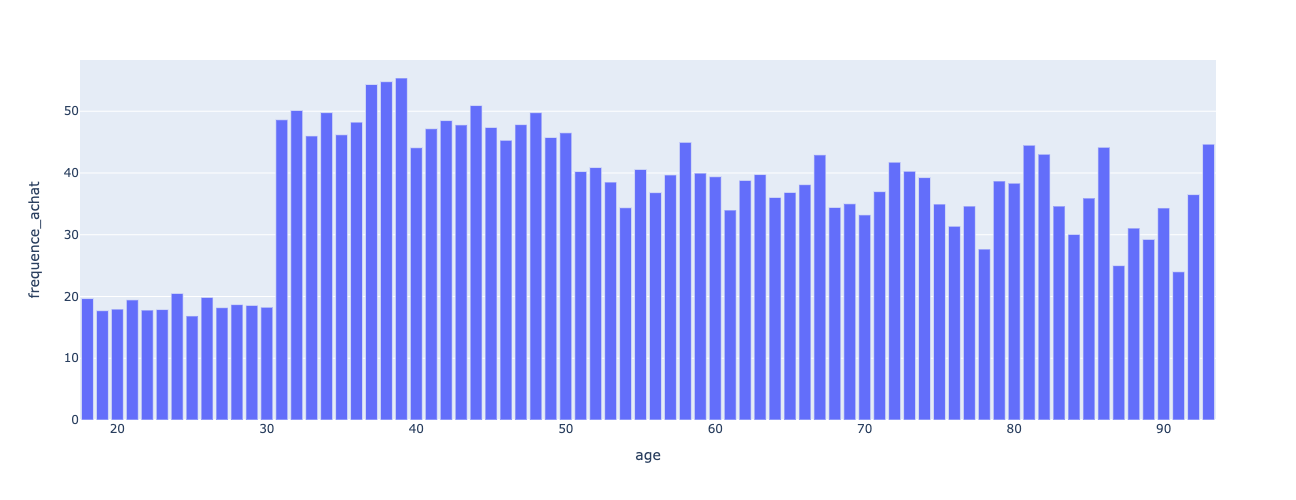

In [115]:
px.bar(frequence_achat1, x='age', y ='frequence_achat',width=900, height=500)

# Corrélation entre l'age et la taille du panier moyen 

In [116]:
# Panier moyen = somme que dépense un client en moyenne
# Si on souhaite le calculer sur une année, il suffit de prendre le chiffre-d'affaires d' une année
# Panier moyen = chiffre-d'affaires total / nombre total de commandes

panier_moyen = round(df_lapage['price'].sum() / len(df_lapage['session_id'])) 
print('En moyenne, un client dépense',(panier_moyen),'euros')

En moyenne, un client dépense 17 euros


In [117]:
# Determination de la valeur du panier moyen par session d'achat par age


df_sess = df_lapage[['session_id', 'price', 'age']]
df_sess = df_lapage.groupby(['age'])[['price']].mean().sort_values(
    'age',ascending = True).reset_index()

df_sess

age      price
0   18.0  40.201577
1   19.0  40.767737
2   20.0  40.158980
3   21.0  41.979704
4   22.0  37.379216
..   ...        ...
71  89.0  16.100856
72  90.0  16.216045
73  91.0  16.561471
74  92.0  17.760487
75  93.0  16.029104

[76 rows x 2 columns]

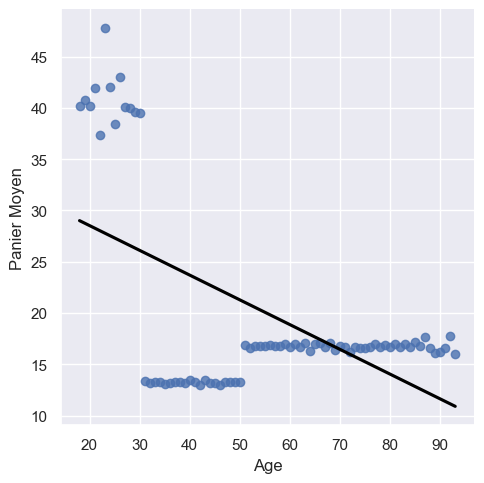

In [118]:
ax = sns.lmplot(x='age', y='price', data = df_sess, ci=None, line_kws={'color':'black'} )
ax.set(xlabel='Age', ylabel='Panier Moyen')
plt.show()

In [119]:
# Determination de la valeur du panier par session d'achat par tranche d'age


df_sess_t = df_lapage[['session_id', 'price', 'tranche_age']]
df_sess_t = df_lapage.groupby(['tranche_age'])[['price']].mean().sort_values(
    'tranche_age',ascending = True).reset_index()

df_sess_t

tranche_age      price
0       18-24  41.959858
1       25-39  17.384638
2       40-59  14.168369
3       60-69  16.793289
4         70+  16.694795

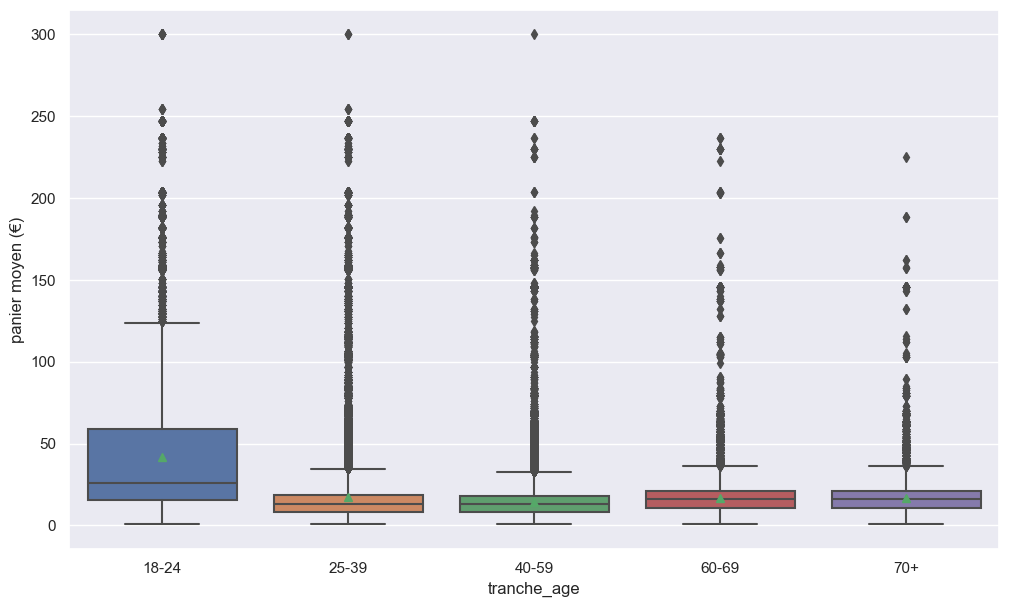

In [120]:
plt.subplots(figsize=(12,7))
ax = sns.boxplot(x="tranche_age", y='price', data= df_lapage, showmeans=True) 
plt.ylabel('panier moyen (€)');

In [121]:
#calcul Spearman et p-value

rho, p = spearmanr(df_sess['age'], df_sess['price'])

# Spearman et p-value

print(rho)

print(p)

-0.08582365003417636
0.46102814239150447


In [122]:
# df panier moyen

paniermoy_age = df_lapage.groupby(by=['age']).agg({'id_prod':'count'})
paniermoy_age = paniermoy_age.reset_index()
paniermoy_age.rename(columns = {'id_prod': 'Art.vendus'}, inplace= True)
paniermoy_age

age  Art.vendus
0   18.0       15149
1   19.0        4371
2   20.0        4587
3   21.0        4252
4   22.0        4415
..   ...         ...
71  89.0         327
72  90.0         311
73  91.0         170
74  92.0         226
75  93.0         201

[76 rows x 2 columns]

In [123]:
#calcul Spearman et p-value

rho, p = spearmanr(paniermoy_age['age'], paniermoy_age['Art.vendus'])

# Spearman et p-value

print(rho)

print(p)

-0.6846206425153794
9.152883867240306e-12


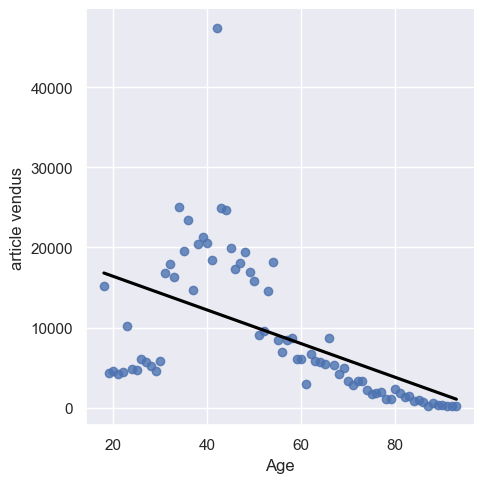

In [124]:
# Visualisation du nombre de vente selon l'age
ax = sns.lmplot(x='age', y='Art.vendus', data = paniermoy_age,
                ci=None, line_kws={'color':'black'} )

ax.set(xlabel='Age', ylabel='article vendus')
plt.show()

# Corrélation entre l'age et les  catégories de livres achetées

In [125]:
# Nombre de livre acheté par age et par catégorie

df_age_categ = pd.pivot_table(df_lapage.reset_index(),
               index='age', columns='categ', values='session_id',aggfunc='count')
df_age_categ

categ   0.0   1.0   2.0
age                    
18.0   3418  5719  6012
19.0    909  1678  1784
20.0   1019  1723  1845
21.0    974  1550  1728
22.0   1116  1628  1671
...     ...   ...   ...
89.0    143   183     1
90.0    132   177     2
91.0     77    91     2
92.0     75   149     2
93.0     78   122     1

[76 rows x 3 columns]

In [126]:
# Nombre de livre acheté par age et par catégorie

df_agecateg = df_lapage[['age', 'categ','session_id' ]].groupby (['age','categ']).count().reset_index()
df_agecateg

age  categ  session_id
0    18.0    0.0        3418
1    18.0    1.0        5719
2    18.0    2.0        6012
3    19.0    0.0         909
4    19.0    1.0        1678
..    ...    ...         ...
223  92.0    1.0         149
224  92.0    2.0           2
225  93.0    0.0          78
226  93.0    1.0         122
227  93.0    2.0           1

[228 rows x 3 columns]

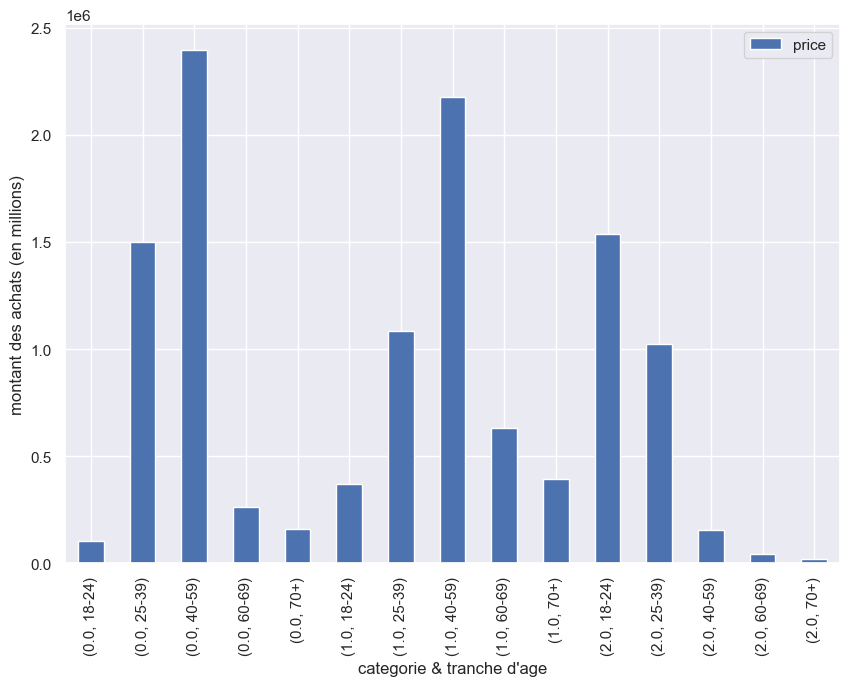

In [127]:
df_lapage.groupby(['categ','tranche_age'])[['price']].sum().plot(kind='bar');
plt.xlabel("categorie & tranche d'age")
plt.ylabel('montant des achats (en millions)');

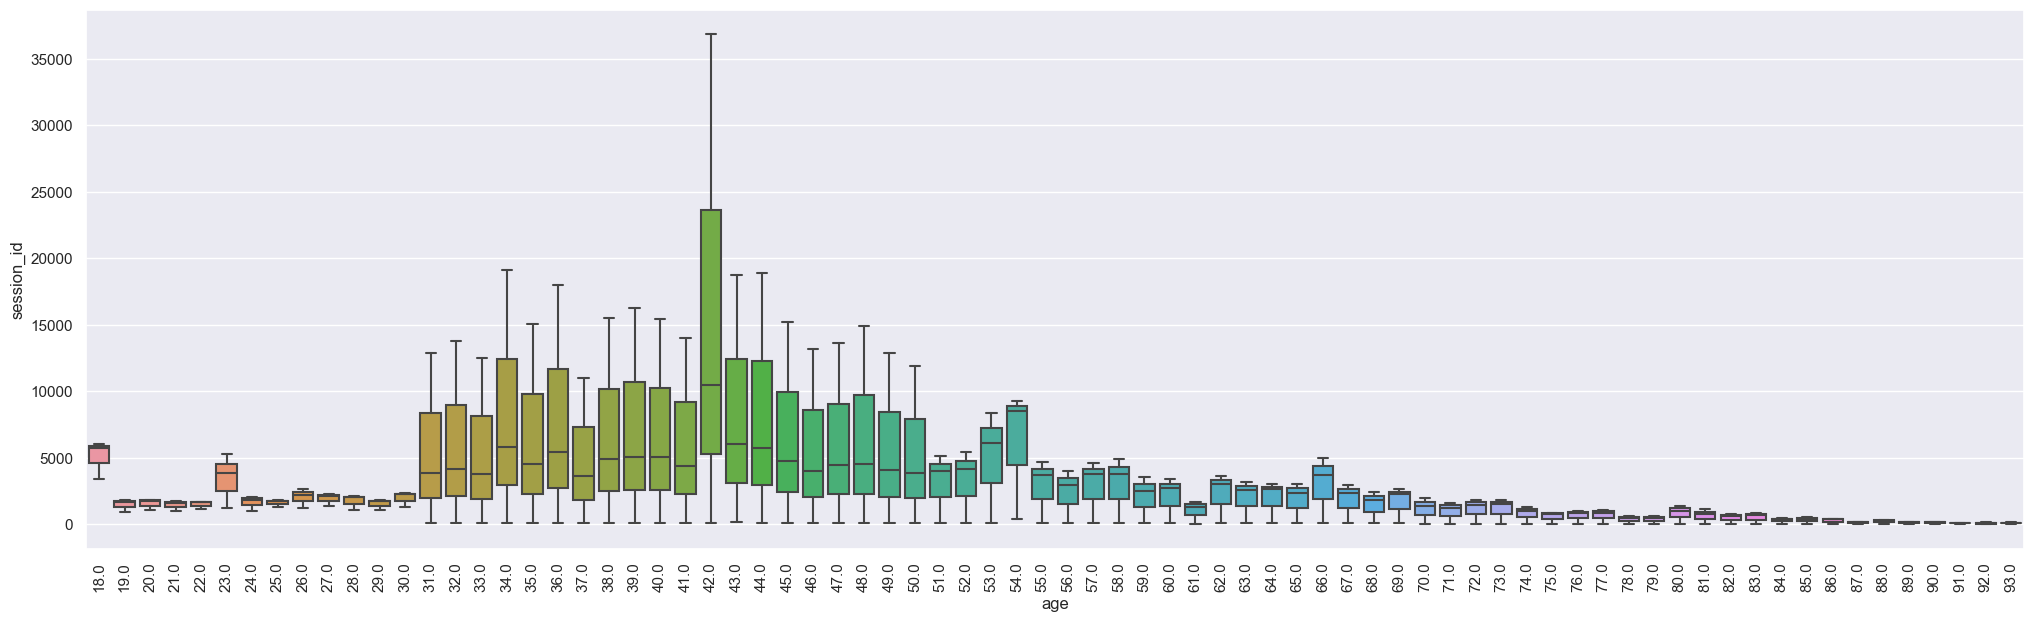

In [128]:
# Nombre d'achat selon l'age

sns.set(rc={"figure.figsize":(25, 7)})
ax=sns.boxplot(x='age', y='session_id', data=df_agecateg);
ax.tick_params(axis='x', rotation=90)

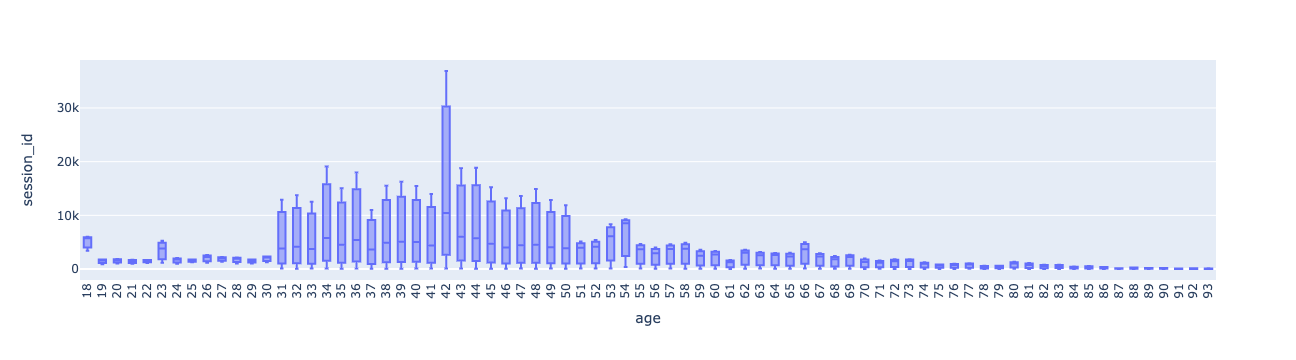

In [129]:
# idem avec infos sur courbes (curseur)

fig = px.box(df_agecateg,x='age', y="session_id")
fig.update_xaxes(dtick=1) 
fig.update_xaxes(tickangle=-90)


In [130]:
# Pearson avec researchpy

rp.corr_pair(df_lapage[["age", "categ"]], method = "pearson")

r value p-value       N
age & categ  -0.0992  0.0000  679332

In [131]:
#calcul Spearman et p-value

rho, p = spearmanr(df_lapage['age'], df_lapage['categ'])

# Spearman et p-value

print(rho)

print(p)

-0.036664043739855254
9.793249309787674e-201


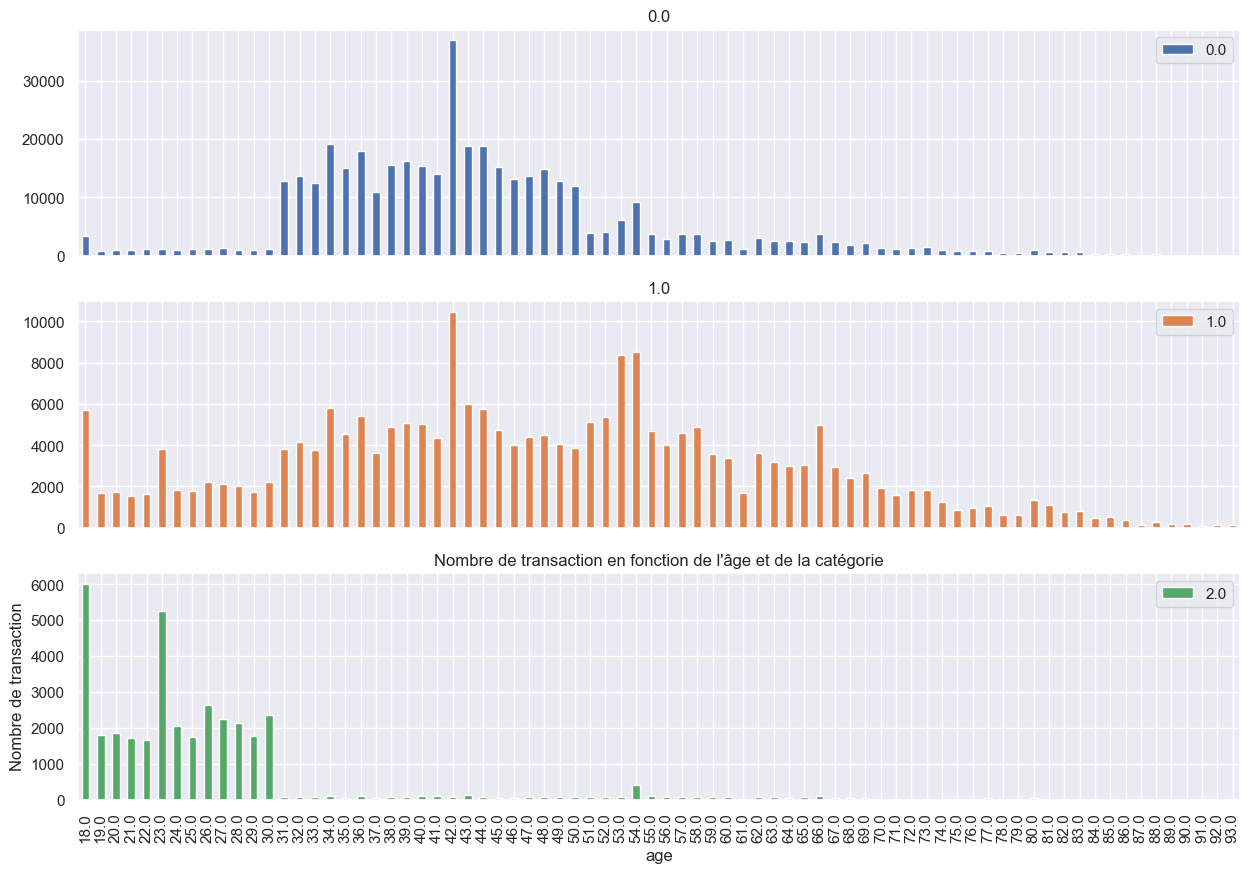

In [132]:
df_age_categ.plot.bar(figsize=(15,10),subplots = True)
plt.ylabel ('Nombre de transaction')
plt.title("Nombre de transaction en fonction de l'âge et de la catégorie")
plt.xlabel("age");

# Corrélation entre la tranche d'age et les  catégories de livres achetées

In [133]:
# Nombre de livre acheté par tranche d'age par catégorie

crosstab_t_a=pd.crosstab(df_lapage.tranche_age, df_lapage.categ,margins=False)
crosstab_t_a

categ           0.0     1.0    2.0
tranche_age                       
18-24          9603   17916  20336
25-39        141079   53063  13488
40-59        225660  106207   1819
60-69         24555   30858    539
70+           14783   19125    301

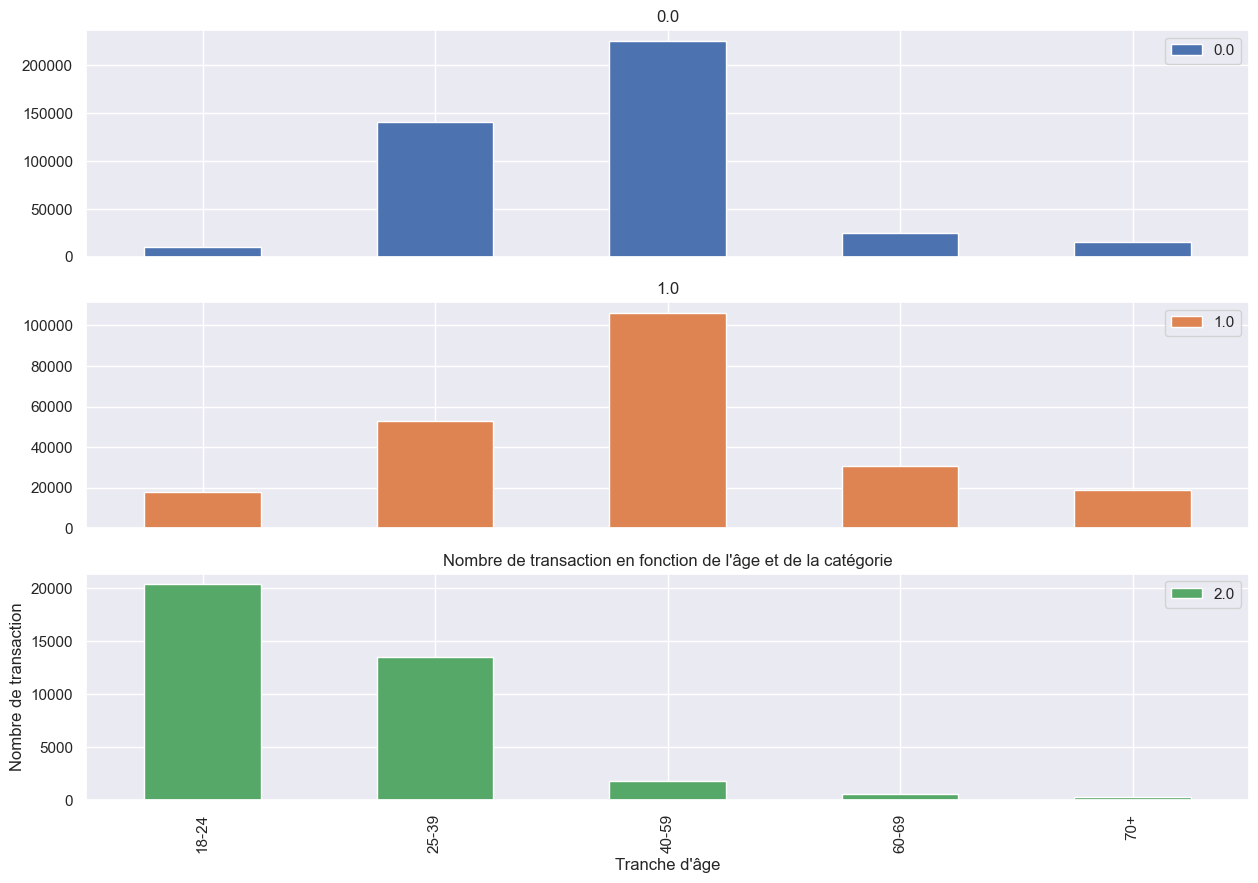

In [134]:
# Visualisation graphique 

crosstab_t_a.plot.bar(figsize=(15,10),subplots = True)
plt.ylabel ('Nombre de transaction')
plt.title("Nombre de transaction en fonction de l'âge et de la catégorie")
plt.xlabel("Tranche d'âge");

In [135]:
#  Tranche_age & Catégorie
Tage_categ = pd.crosstab(index=df_lapage["tranche_age"], columns=df_lapage["categ"], margins=True, normalize='index')
Tage_categ.columns = ["categ0","categ1","categ2"]
Tage_categ.index= ["18-24","25-39","40-59","60-59",'70+',"total"]
Tage_categ
from scipy import stats
chi = stats.chi2_contingency(Tage_categ)
chi
# https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/07_contingency.html

(1.9638967259503108,
 0.9966094371031032,
 10,
 array([[0.50654959, 0.39886713, 0.09458328],
        [0.50654959, 0.39886713, 0.09458328],
        [0.50654959, 0.39886713, 0.09458328],
        [0.50654959, 0.39886713, 0.09458328],
        [0.50654959, 0.39886713, 0.09458328],
        [0.50654959, 0.39886713, 0.09458328]]))

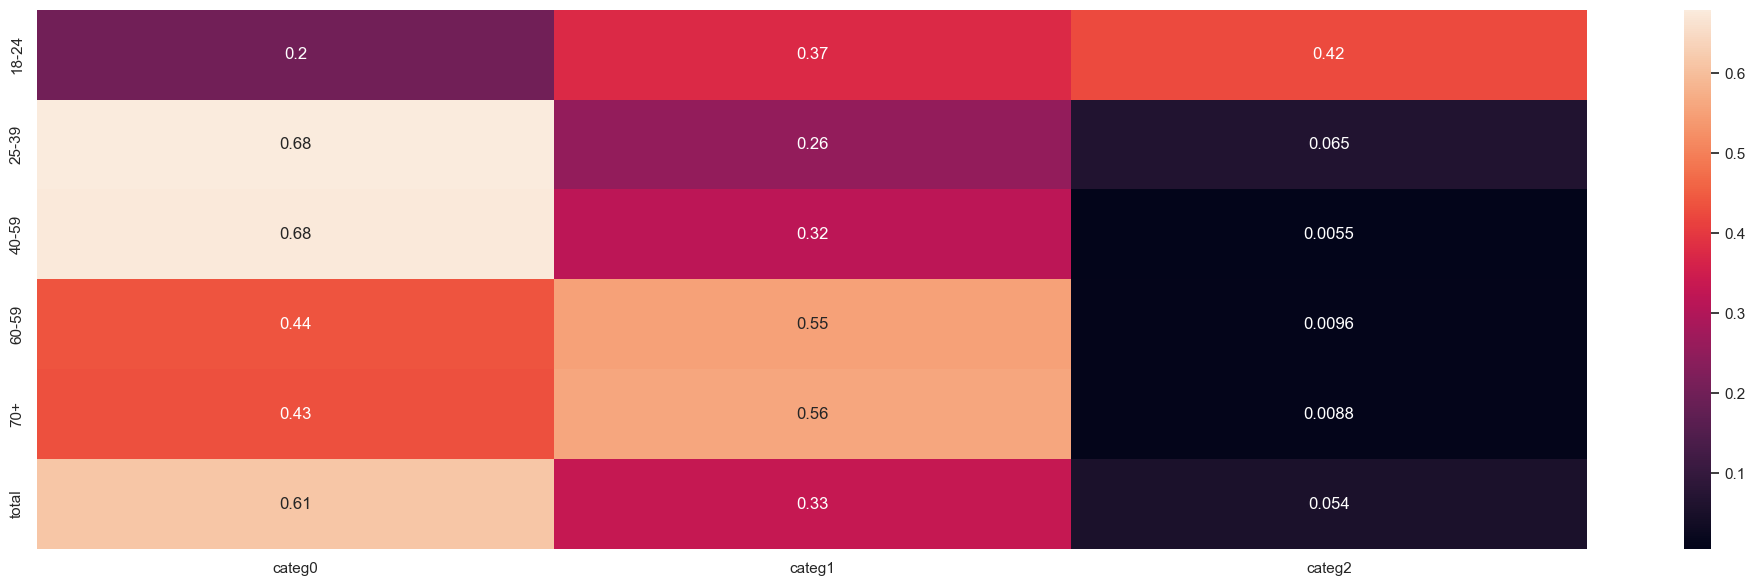

In [136]:
Tage_categ.drop("total") 
sns.heatmap(Tage_categ[:],annot=True);

On peut conclure ici que la corrélation est très faible et que les deux variables sont par conséquent indépendantes